# Part 1: Purpose of the Project:
1. Understand the use and power of AI and ML in market segmentation to transform marketing departments.
2. Perform exploratory data analysis, data wrangling, and visualize interactive data plots using plotly.
3. Understand the concept of autoencoders.
4. Build and train autoencoder models in keras and tensorflow 2.0 for dimensionality reduction.
5. Understand the concept of K-means clustering algorithm.
6. Find the optimal number of clusters using the elbow method.
7. Apply K-means algorithms in scikit-learn for market segmentation.
8. Understand the concept of Principle Components Analysis (PCA).
9. Apply PCA for dimensionality reduction.

Marketing is a critical component of any business to ensure its growth and sustainability. Marketing helps build the company's brand, grow revenue, and drive customer engagement. There are four functions of any marketing department:
1. Educating the value proposition of products and services to customers and potential customers.
2. Ensuring customer engagement and understanding customer needs.
3. Driving traffic to products and services.
4. Empowering business growth by contacting new and potential customers.

In our project, we will try to understand our customers by grouping them into distinctive groups and then correspodingly tailor a targetted marketing ad campaign, instead of sending out the same ad campaign to everybody.

As a result, the fundamental learning outcome of this project is to perform market segmentation using AI/ML techniques (unsupervised ML techniques in particular).

We have extensive data about customers for the duration of 2.5 years. We will divide the customers into at least 3 distinct groups and create a targeted ad marketing campaign for each of them.

In our data, we have features like order number, number of items ordered, price of item, amount of sales for the item, date of order, and the shipping status of the order. We also have the quarter, month, and year in which the order was placed, the product category, and the name and phone number of the customer placing the order. Moreover, we have the address to which the product needs to be shipped, the city, state, postal code, country, and territory in which the person resides, the size of the order, and finally the contact person's first and last name.

# Part 2: Import Libraries and Datasets

In [ ]:
#import necessary libraries and packages
#apply autoencoders using tensorflow 2.0 and keras. For K-means clustering and PCA, we will use scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import plotly.express as px
import plotly.graph_objects as go
import zipfile
import tensorflow as tf
from tensorflow.keras import layers, optimizers
from tensorflow.python.keras import Sequential
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Input, Add, Activation, Conv2D, MaxPooling2D, AveragePooling2D, ZeroPadding2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras import backend as K
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
from IPython.display import display
%matplotlib inline

In [ ]:
!unzip AI+in+Marketing+Dataset.zip

Archive:  AI+in+Marketing+Dataset.zip
   creating: AI in Marketing Dataset/
  inflating: AI in Marketing Dataset/autoencoder.h5  
  inflating: AI in Marketing Dataset/sales_data_sample.csv  


In [ ]:
%cd '/content/AI in Marketing Dataset'

/content/AI in Marketing Dataset


In [ ]:
#load the sales dataframe
sales = pd.read_csv('/content/AI in Marketing Dataset/sales_data_sample.csv', encoding='latin1')

In [ ]:
sales
#MSRP is the Manufacturer Suggested Retail Price, used to standardize the price of products across several store locations of a company.

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [ ]:
#get the types of data
sales.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [ ]:
#check format of ORDERDATE
sales['ORDERDATE']

0        2/24/2003 0:00
1         5/7/2003 0:00
2         7/1/2003 0:00
3        8/25/2003 0:00
4       10/10/2003 0:00
             ...       
2818     12/2/2004 0:00
2819     1/31/2005 0:00
2820      3/1/2005 0:00
2821     3/28/2005 0:00
2822      5/6/2005 0:00
Name: ORDERDATE, Length: 2823, dtype: object

In [ ]:
#Change format of ORDERDATE to date time format using pandas
sales['ORDERDATE'] = pd.to_datetime(sales['ORDERDATE'])
sales['ORDERDATE']
#we notice that the data type has been changed from object to datetime64

0      2003-02-24
1      2003-05-07
2      2003-07-01
3      2003-08-25
4      2003-10-10
          ...    
2818   2004-12-02
2819   2005-01-31
2820   2005-03-01
2821   2005-03-28
2822   2005-05-06
Name: ORDERDATE, Length: 2823, dtype: datetime64[ns]

In [ ]:
#How many null elements exist in the address columns? ADDRESSLINE1, ADDRESSLINE2, POSTALCODE, STATE, COUNTRY, TERRITORY
print("ADDRESSLINE1 Null Elements: ", sales['ADDRESSLINE1'].isnull().sum()) # Use a comma to separate the string and the integer value
print("ADDRESSLINE2 Null Elements: ", sales['ADDRESSLINE2'].isnull().sum()) #2521 null elements exist in ADDRESSLINE2
print("POSTALCODE Null Elements: ", sales['POSTALCODE'].isnull().sum())
print("STATE Null Elements: ", sales['STATE'].isnull().sum())
print("COUNTRY Null Elements: ", sales['COUNTRY'].isnull().sum())
print("TERRITORY Null Elements: ", sales['TERRITORY'].isnull().sum())

ADDRESSLINE1 Null Elements:  0
ADDRESSLINE2 Null Elements:  2521
POSTALCODE Null Elements:  76
STATE Null Elements:  1486
COUNTRY Null Elements:  0
TERRITORY Null Elements:  1074


In [ ]:
#Since we have multiple null values in ADDRESSLINE2, POSTALCODE, STATE, and TERRITORY, we will drop them from our dataset
#We do not want a specific line of address either if we are not considering state or postal code, so we will drop ADDRESSLINE1 as well
sales = sales.drop(['ADDRESSLINE1', 'ADDRESSLINE2', 'POSTALCODE', 'STATE', 'TERRITORY'], axis=1)

In [ ]:
sales

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,CITY,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,NYC,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,Reims,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,Paris,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,Pasadena,USA,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,San Francisco,USA,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,2004-12-02,Shipped,4,12,2004,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,Madrid,Spain,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,2005-01-31,Shipped,1,1,2005,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",981-443655,Oulu,Finland,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,2005-03-01,Resolved,1,3,2005,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,Madrid,Spain,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,2005-03-28,Shipped,1,3,2005,Ships,54,S72_3212,Alpha Cognac,61.77.6555,Toulouse,France,Roulet,Annette,Small


In [ ]:
#CITY, PHONENUMBER, CONTACTLASTNAME and CONTACTFIRSTNAME, CUSTOMERNAME, ORDERNUMBER are not necessary for the svope of our project as well, so we will drop them too
sales = sales.drop(['CITY','ORDERNUMBER', 'PHONE', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'CUSTOMERNAME'], axis=1)
sales

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,S10_1678,USA,Small
1,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,95,S10_1678,France,Small
2,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,95,S10_1678,France,Medium
3,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,Motorcycles,95,S10_1678,USA,Medium
4,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,Motorcycles,95,S10_1678,USA,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,15,2244.40,2004-12-02,Shipped,4,12,2004,Ships,54,S72_3212,Spain,Small
2819,29,100.00,1,3978.51,2005-01-31,Shipped,1,1,2005,Ships,54,S72_3212,Finland,Medium
2820,43,100.00,4,5417.57,2005-03-01,Resolved,1,3,2005,Ships,54,S72_3212,Spain,Medium
2821,34,62.24,1,2116.16,2005-03-28,Shipped,1,3,2005,Ships,54,S72_3212,France,Small


In [ ]:
#checking for null elements now, we should not have any
sales.isnull().sum() # we have no null elements, so that is good

QUANTITYORDERED    0
PRICEEACH          0
ORDERLINENUMBER    0
SALES              0
ORDERDATE          0
STATUS             0
QTR_ID             0
MONTH_ID           0
YEAR_ID            0
PRODUCTLINE        0
MSRP               0
PRODUCTCODE        0
COUNTRY            0
DEALSIZE           0
dtype: int64

MINI CHALLENGE: How many unique values exist in 'country'? And how many unique product codes and product lines exist?

In [ ]:
print("COUNTRY number of unique values:",sales['COUNTRY'].nunique())
print("PRODUCT CODE number of unique values:",sales['PRODUCTCODE'].nunique())
print("PRODUCT LINE number of unique values:",sales['PRODUCTLINE'].nunique())

COUNTRY number of unique values: 19
PRODUCT CODE number of unique values: 109
PRODUCT LINE number of unique values: 7


# Part 3: Perform Exploratory Data Analysis and Data Wrangling

In [ ]:
#We want to see the unique countries in our dataset
sales['COUNTRY'].unique()

array(['USA', 'France', 'Norway', 'Australia', 'Finland', 'Austria', 'UK',
       'Spain', 'Sweden', 'Singapore', 'Canada', 'Japan', 'Italy',
       'Denmark', 'Belgium', 'Philippines', 'Germany', 'Switzerland',
       'Ireland'], dtype=object)

In [ ]:
#Let's see how many samples belong to each country
sales['COUNTRY'].value_counts()

COUNTRY
USA            1004
Spain           342
France          314
Australia       185
UK              144
Italy           113
Finland          92
Norway           85
Singapore        79
Canada           70
Denmark          63
Germany          62
Sweden           57
Austria          55
Japan            52
Belgium          33
Switzerland      31
Philippines      26
Ireland          16
Name: count, dtype: int64

In [ ]:
#Plot a bar plot with x as the name of the column and y as the number of instances for each country
#We will be using Plotly to make interactive and publication-quality images
#We will be using px (plotly express) as a high-level wrapper around plotly to make this graph
def barplot(x):
  fig = plt.Figure(figsize = (14, 7))
  fig = px.bar(x = sales[x].unique(), y = sales[x].value_counts(), color = sales[x].unique(), labels = {'Country':x, 'y':'Number of Samples'}, height = 500)
  fig.show()

In [ ]:
#Call this function for the entire COUNTRY column
barplot('COUNTRY')
#We can hover over the bars to see the exact samples per country. This is an interactive plot

MINI CHALLENGE: How many unique order status values do we have? Do we have balanced datasets? Comment on the result and propose a corresponding solution if needed.

In [ ]:
print("Unique ORDER STATUS values:", sales['STATUS'].nunique())

Unique ORDER STATUS values: 6


In [ ]:
barplot('STATUS') #most status values are 'Shipped'. We do not have a balanced dataset - highly unbalanced.
#One solution is to downsample the 'Shipped' column or upsample the rest of the features. However, a more effective and easier solution would be to simple drop the column

In [ ]:
sales = sales.drop(['STATUS'], axis=1)

In [ ]:
sales

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,2003-02-24,1,2,2003,Motorcycles,95,S10_1678,USA,Small
1,34,81.35,5,2765.90,2003-05-07,2,5,2003,Motorcycles,95,S10_1678,France,Small
2,41,94.74,2,3884.34,2003-07-01,3,7,2003,Motorcycles,95,S10_1678,France,Medium
3,45,83.26,6,3746.70,2003-08-25,3,8,2003,Motorcycles,95,S10_1678,USA,Medium
4,49,100.00,14,5205.27,2003-10-10,4,10,2003,Motorcycles,95,S10_1678,USA,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,15,2244.40,2004-12-02,4,12,2004,Ships,54,S72_3212,Spain,Small
2819,29,100.00,1,3978.51,2005-01-31,1,1,2005,Ships,54,S72_3212,Finland,Medium
2820,43,100.00,4,5417.57,2005-03-01,1,3,2005,Ships,54,S72_3212,Spain,Medium
2821,34,62.24,1,2116.16,2005-03-28,1,3,2005,Ships,54,S72_3212,France,Small


In [ ]:
#Let's see the instances for each product line:
barplot('PRODUCTLINE')

In [ ]:
#Let's see the instances for each deal size:
barplot('DEALSIZE') #We do not have a fully balanced dataset in this case either

In [ ]:
#Now, we will create a function to replace categorical variables by dummy variables
def dummy(df, x):
  dummy_df = pd.get_dummies(df[x]) #get dummy variables
  df = df.drop([x], axis=1) #drop original column
  df = pd.concat([df, dummy_df], axis=1)
  return df

In [ ]:
#Get dummy variables for the COUNTRY column
sales = dummy(sales, 'COUNTRY')
sales

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,...,Italy,Japan,Norway,Philippines,Singapore,Spain,Sweden,Switzerland,UK,USA
0,30,95.70,2,2871.00,2003-02-24,1,2,2003,Motorcycles,95,...,False,False,False,False,False,False,False,False,False,True
1,34,81.35,5,2765.90,2003-05-07,2,5,2003,Motorcycles,95,...,False,False,False,False,False,False,False,False,False,False
2,41,94.74,2,3884.34,2003-07-01,3,7,2003,Motorcycles,95,...,False,False,False,False,False,False,False,False,False,False
3,45,83.26,6,3746.70,2003-08-25,3,8,2003,Motorcycles,95,...,False,False,False,False,False,False,False,False,False,True
4,49,100.00,14,5205.27,2003-10-10,4,10,2003,Motorcycles,95,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,15,2244.40,2004-12-02,4,12,2004,Ships,54,...,False,False,False,False,False,True,False,False,False,False
2819,29,100.00,1,3978.51,2005-01-31,1,1,2005,Ships,54,...,False,False,False,False,False,False,False,False,False,False
2820,43,100.00,4,5417.57,2005-03-01,1,3,2005,Ships,54,...,False,False,False,False,False,True,False,False,False,False
2821,34,62.24,1,2116.16,2005-03-28,1,3,2005,Ships,54,...,False,False,False,False,False,False,False,False,False,False


MINI CHALLENGE: Obtain dummies for product line and deal size and see if the transformation was successful

In [ ]:
sales = dummy(sales, 'PRODUCTLINE')
sales

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,...,Switzerland,UK,USA,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars
0,30,95.70,2,2871.00,2003-02-24,1,2,2003,95,S10_1678,...,False,False,True,False,True,False,False,False,False,False
1,34,81.35,5,2765.90,2003-05-07,2,5,2003,95,S10_1678,...,False,False,False,False,True,False,False,False,False,False
2,41,94.74,2,3884.34,2003-07-01,3,7,2003,95,S10_1678,...,False,False,False,False,True,False,False,False,False,False
3,45,83.26,6,3746.70,2003-08-25,3,8,2003,95,S10_1678,...,False,False,True,False,True,False,False,False,False,False
4,49,100.00,14,5205.27,2003-10-10,4,10,2003,95,S10_1678,...,False,False,True,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,15,2244.40,2004-12-02,4,12,2004,54,S72_3212,...,False,False,False,False,False,False,True,False,False,False
2819,29,100.00,1,3978.51,2005-01-31,1,1,2005,54,S72_3212,...,False,False,False,False,False,False,True,False,False,False
2820,43,100.00,4,5417.57,2005-03-01,1,3,2005,54,S72_3212,...,False,False,False,False,False,False,True,False,False,False
2821,34,62.24,1,2116.16,2005-03-28,1,3,2005,54,S72_3212,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
sales = dummy(sales, 'DEALSIZE')
sales

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,30,95.70,2,2871.00,2003-02-24,1,2,2003,95,S10_1678,...,False,True,False,False,False,False,False,False,False,True
1,34,81.35,5,2765.90,2003-05-07,2,5,2003,95,S10_1678,...,False,True,False,False,False,False,False,False,False,True
2,41,94.74,2,3884.34,2003-07-01,3,7,2003,95,S10_1678,...,False,True,False,False,False,False,False,False,True,False
3,45,83.26,6,3746.70,2003-08-25,3,8,2003,95,S10_1678,...,False,True,False,False,False,False,False,False,True,False
4,49,100.00,14,5205.27,2003-10-10,4,10,2003,95,S10_1678,...,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,15,2244.40,2004-12-02,4,12,2004,54,S72_3212,...,False,False,False,True,False,False,False,False,False,True
2819,29,100.00,1,3978.51,2005-01-31,1,1,2005,54,S72_3212,...,False,False,False,True,False,False,False,False,True,False
2820,43,100.00,4,5417.57,2005-03-01,1,3,2005,54,S72_3212,...,False,False,False,True,False,False,False,False,True,False
2821,34,62.24,1,2116.16,2005-03-28,1,3,2005,54,S72_3212,...,False,False,False,True,False,False,False,False,False,True


In [ ]:
sales.replace({False: 0, True: 1}, inplace=True) #showing False = 0 and True = 1
sales

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,30,95.70,2,2871.00,2003-02-24,1,2,2003,95,S10_1678,...,0,1,0,0,0,0,0,0,0,1
1,34,81.35,5,2765.90,2003-05-07,2,5,2003,95,S10_1678,...,0,1,0,0,0,0,0,0,0,1
2,41,94.74,2,3884.34,2003-07-01,3,7,2003,95,S10_1678,...,0,1,0,0,0,0,0,0,1,0
3,45,83.26,6,3746.70,2003-08-25,3,8,2003,95,S10_1678,...,0,1,0,0,0,0,0,0,1,0
4,49,100.00,14,5205.27,2003-10-10,4,10,2003,95,S10_1678,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,15,2244.40,2004-12-02,4,12,2004,54,S72_3212,...,0,0,0,1,0,0,0,0,0,1
2819,29,100.00,1,3978.51,2005-01-31,1,1,2005,54,S72_3212,...,0,0,0,1,0,0,0,0,1,0
2820,43,100.00,4,5417.57,2005-03-01,1,3,2005,54,S72_3212,...,0,0,0,1,0,0,0,0,1,0
2821,34,62.24,1,2116.16,2005-03-28,1,3,2005,54,S72_3212,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
#Use pd.Categorical to convert PRODUCTLINE to unique category format
y = pd.Categorical(sales['PRODUCTCODE']).codes #now we will get the unique product codes
y

array([  0,   0,   0, ..., 108, 108, 108], dtype=int8)

In [ ]:
sales['PRODUCTCODE'].nunique() #we have 109 unique codes, which matches our format above

109

In [ ]:
#We can take these PRODUCTCODE values to train our model, but this is not the optimal way of dealing with this problem, due to the curse of dimensionality
#As a result, we should perform one hot encoding. We will not cover one hot encoding in this project for now.
sales['PRODUCTCODE'] = y #fitting y in the dataframe
sales

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,30,95.70,2,2871.00,2003-02-24,1,2,2003,95,0,...,0,1,0,0,0,0,0,0,0,1
1,34,81.35,5,2765.90,2003-05-07,2,5,2003,95,0,...,0,1,0,0,0,0,0,0,0,1
2,41,94.74,2,3884.34,2003-07-01,3,7,2003,95,0,...,0,1,0,0,0,0,0,0,1,0
3,45,83.26,6,3746.70,2003-08-25,3,8,2003,95,0,...,0,1,0,0,0,0,0,0,1,0
4,49,100.00,14,5205.27,2003-10-10,4,10,2003,95,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,15,2244.40,2004-12-02,4,12,2004,54,108,...,0,0,0,1,0,0,0,0,0,1
2819,29,100.00,1,3978.51,2005-01-31,1,1,2005,54,108,...,0,0,0,1,0,0,0,0,1,0
2820,43,100.00,4,5417.57,2005-03-01,1,3,2005,54,108,...,0,0,0,1,0,0,0,0,1,0
2821,34,62.24,1,2116.16,2005-03-28,1,3,2005,54,108,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
#Now, we will group data based on when the products were ordered:
sales_group = sales.groupby('ORDERDATE').sum()
sales_group

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
ORDERDATE,,,,,,,,,,,,,,,,,,,,,
2003-01-06,151,288.78,10,12133.25,4,4,8012,363,174,0,...,0,0,0,0,0,0,4,0,2,2
2003-01-09,142,284.96,10,11432.34,4,4,8012,372,181,0,...,0,0,0,0,0,0,4,0,2,2
2003-01-10,80,150.14,3,6864.05,2,2,4006,155,37,0,...,0,0,0,0,0,0,2,0,1,1
2003-01-29,541,1417.54,136,54702.00,16,16,32048,1695,723,0,...,3,0,0,0,0,7,6,0,10,6
2003-01-31,443,1061.89,91,44621.96,13,13,26039,1365,720,0,...,7,0,0,0,2,4,0,0,8,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-05-13,259,561.18,21,31821.90,12,30,12030,728,101,0,...,0,6,0,0,0,0,0,2,3,1
2005-05-17,509,1269.43,105,59475.10,28,70,28070,1669,462,0,...,14,0,0,0,0,0,0,2,8,4
2005-05-29,607,1148.40,94,51233.18,30,75,30075,1328,797,13,...,7,0,0,0,0,0,8,0,8,7


Time for some data visualizations based on this grouped data!

In [ ]:
#Extract the month from the dataset as a new column
#changing the month number to the month name
sales_group['MONTH'] = sales_group['MONTH_ID'].replace({1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'})
sales_group

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,...,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small,MONTH
ORDERDATE,,,,,,,,,,,,,,,,,,,,,
2003-01-06,151,288.78,10,12133.25,4,4,8012,363,174,0,...,0,0,0,0,0,4,0,2,2,April
2003-01-09,142,284.96,10,11432.34,4,4,8012,372,181,0,...,0,0,0,0,0,4,0,2,2,April
2003-01-10,80,150.14,3,6864.05,2,2,4006,155,37,0,...,0,0,0,0,0,2,0,1,1,February
2003-01-29,541,1417.54,136,54702.00,16,16,32048,1695,723,0,...,0,0,0,0,7,6,0,10,6,16
2003-01-31,443,1061.89,91,44621.96,13,13,26039,1365,720,0,...,0,0,0,2,4,0,0,8,5,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-05-13,259,561.18,21,31821.90,12,30,12030,728,101,0,...,6,0,0,0,0,0,2,3,1,30
2005-05-17,509,1269.43,105,59475.10,28,70,28070,1669,462,0,...,0,0,0,0,0,0,2,8,4,70
2005-05-29,607,1148.40,94,51233.18,30,75,30075,1328,797,13,...,0,0,0,0,0,8,0,8,7,75


In [ ]:
#We can also create a line plot - once again, November on average is when we see the peaks
fig = px.line(sales_group.reset_index(), x = 'ORDERDATE', y = 'SALES', title = 'Sales') # Reset the index to make 'ORDERDATE' a regular column
fig.show()

In [ ]:
#we don't need the exact ORDERDATE because having the Month will be enough:
sales.drop('ORDERDATE', axis=1, inplace = True)
sales

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,30,95.70,2,2871.00,1,2,2003,95,0,0,...,0,1,0,0,0,0,0,0,0,1
1,34,81.35,5,2765.90,2,5,2003,95,0,0,...,0,1,0,0,0,0,0,0,0,1
2,41,94.74,2,3884.34,3,7,2003,95,0,0,...,0,1,0,0,0,0,0,0,1,0
3,45,83.26,6,3746.70,3,8,2003,95,0,0,...,0,1,0,0,0,0,0,0,1,0
4,49,100.00,14,5205.27,4,10,2003,95,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,15,2244.40,4,12,2004,54,108,0,...,0,0,0,1,0,0,0,0,0,1
2819,29,100.00,1,3978.51,1,1,2005,54,108,0,...,0,0,0,1,0,0,0,0,1,0
2820,43,100.00,4,5417.57,1,3,2005,54,108,0,...,0,0,0,1,0,0,0,0,1,0
2821,34,62.24,1,2116.16,1,3,2005,54,108,0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
#Plot the correlation matrix between variables - take only those features that have not been encoded
#Select only numeric columns
numeric_sales = sales.select_dtypes(include=['number']).iloc[:,:9]
corr = numeric_sales.corr()
corr

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE
QUANTITYORDERED,1.000000,0.005564,-0.018397,0.551426,-0.035323,-0.039048,0.069535,0.017881,-0.005400
PRICEEACH,0.005564,1.000000,-0.020965,0.657841,0.008712,0.005152,-0.005938,0.670625,-0.276001
ORDERLINENUMBER,-0.018397,-0.020965,1.000000,-0.058400,0.040716,0.034016,-0.057367,-0.021067,0.034087
SALES,0.551426,0.657841,-0.058400,1.000000,-0.006796,-0.009605,0.035647,0.635239,-0.335955
QTR_ID,-0.035323,0.008712,0.040716,-0.006796,1.000000,0.979300,-0.433052,0.010234,-0.017200
MONTH_ID,-0.039048,0.005152,0.034016,-0.009605,0.979300,1.000000,-0.430163,0.008170,-0.011870
YEAR_ID,0.069535,-0.005938,-0.057367,0.035647,-0.433052,-0.430163,1.000000,-0.014310,0.024560
MSRP,0.017881,0.670625,-0.021067,0.635239,0.010234,0.008170,-0.014310,1.000000,-0.544184
PRODUCTCODE,-0.005400,-0.276001,0.034087,-0.335955,-0.017200,-0.011870,0.024560,-0.544184,1.000000


<Axes: >

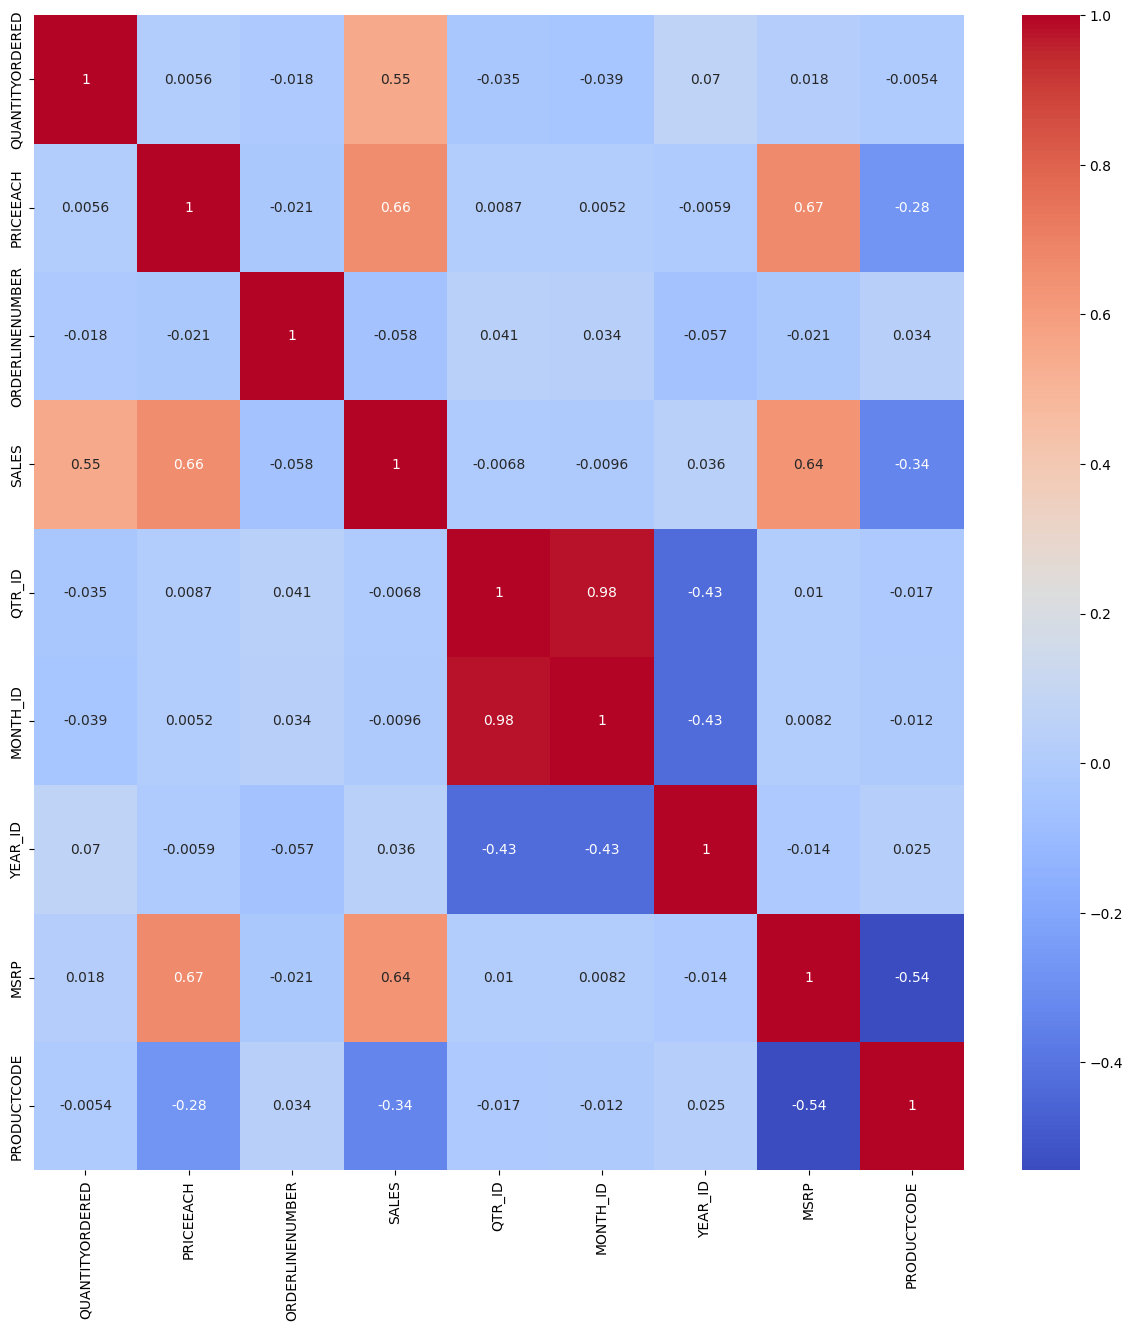

In [ ]:
#generate corresponding heatmap from the correlation matrix
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, cmap='coolwarm')
#MSRP is positively correlated with PRICEEACH and SALES.
#QUANTITYORDERED and SALES are positively correlated.
#MONTH_ID and QUARTER_ID are almost perfectly correlated.


In [ ]:
#since MONTH_ID and QUARTER_ID are almost perfectly correlated and we need to prevent the curse of dimensionality, we can drop either column
#Dropping QUARTER_ID
#We will drop DATE from
sales.drop("QTR_ID", axis=1, inplace=True)
sales.shape

(2823, 37)

In [ ]:
# Let's plot distplots
# Distplot the following
# (1) Histogram: Here, every bar groups numbers into ranges and taller bars show that more samples lie within that range
# (2) Kde Plot: Kernel Density Estimate plot indicates Probability Density of a continuous variable.
# (3) Rug plot: data plot of a single quantitative variable, displayed as marks along an axis (one-dimensional scatter plot).

import plotly.figure_factory as ff

plt.figure(figsize = (10, 10))

for i in range(8):
  #Go through each column except ORDERLINE number and create displot by converting the variable into the float format
  if sales.columns[i] != 'ORDERLINENUMBER':
    fig = ff.create_distplot([sales[sales.columns[i]].apply(lambda x: float(x))], ['distplot'])
    fig.update_layout(title_text = sales.columns[i])
    fig.show()

<Figure size 1000x1000 with 0 Axes>

1. Bars indicate the histogram, a curved line indicates the KDE plot.
2. The rug plot complemented with the histogram tells us the exact distribution of the data. A rug plot is a scatterplot on only one dimension of the data.

Now, we will visualize the relationships between variables using a scatter matrix and pairplots.

In [ ]:
plt.figure(figsize = (15, 15))
fig = px.scatter_matrix(sales, dimensions = sales.columns[:9], color = 'MONTH_ID', title = 'Sales Data', width = 1200, height = 1200)
fig.show()
#We have all the variables on the x and y axes and we are plotting scatterplots between each of them to see pairplots.
#If the color is a little dark, it means that the month is in the January-February timeframe. As we move upwards to the yellow
#color, it means that the month is in the November-December timeframe.

# A trend exists between 'SALES' and 'QUANTITYORDERED', between 'MSRP' and 'PRICEEACH' (although there are outliers), between 'PRICEEACH' and 'SALES'
# Sales growth exists as we move from 2013 to 2014 to 2015 ('SALES' vs. 'YEAR_ID')

#As a result, we can relate variables across multiple scatter plots

<Figure size 1500x1500 with 0 Axes>

#Part 5: K-Means Clustering
K-Means is an unsupervised machine learning algorithm, which works by trying to group some data points together as per similar attribute values by estimating the Euclidian distance between them.

The following is the K-Means algorithm:
1. Choose a number of clusters, call it K.
2. Select K points on random that would serve as the centroids of each cluster.
3. Assign each data point to the nearest centroid to create K number of clusters.
4. Calculate the new centroid of each cluster.
5. Re-assign each data point to the new closest centroid.
6. Repeat from step 4 until the clusters and centroids are determined.

How can we calculate the optimal number of clusters? We can use the elbow method to solve this.

First, we calculate the Within Cluster Sum of Squares(WCSS), which is the sum of the squares of the distances of each data point and its corresponding centroid of each cluster (based on cluster number K(i)).

As the number of clusters increases, WCSS decreases, since the distance between data points and the centroids of the clusters decreases.

In the elbow method, we choose the optimal number of K by plotting the WCSS with respect to the number of clusters K. As K increases, WCSS decreases. We choose K when the change in WCSS becomes almost linear at the specific breakpoint, mimicking an elbow point.

The elbow method is a heuristic method of interpretation within cluster analysis.

#Part 6: Use the Elbow Method to Find the Optimal Number of K

In [ ]:
#scale the data
scaler = StandardScaler()
X = scaler.fit_transform(sales)

In [ ]:
X.shape

(2823, 37)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

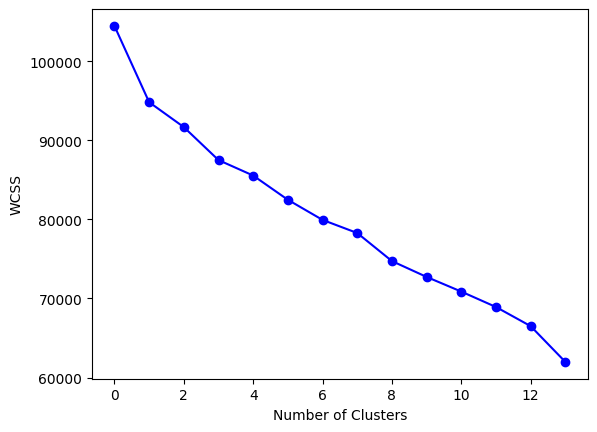

In [ ]:
#Plotting WCSS against the value of K
scores = []
for k in range(1, 15): # Use the built-in range function
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    scores.append(kmeans.inertia_)#inertia represents the Sum of Squared distances of the samples to their closest cluster centroid
    #Append the distances to scores

plt.plot(scores, 'bo-') # Use range here as well
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()
#Every time we run this cell, the plot seems to change.


It is quite hard to drop the elbow method in this case. So, we will apply an auto-encoder, an artificial neural network to encode our features. Eventually we would be able to evaluate the optimal number of clusters.

For now, we will take K=5.

#Part 7: Apply K-Means

In [ ]:
#Using K-Means clustering algorithm, cluster the data
kmeans = KMeans(n_clusters=5)
kmeans.fit(X) #fit k means algorithm
labels = kmeans.labels_ #get the labels for each point

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
labels

array([1, 1, 2, ..., 3, 3, 3], dtype=int32)

In [ ]:
#get the shape of the centroids
kmeans.cluster_centers_.shape

(5, 37)

In [ ]:
#Let's delve deeper into our centroids by displaying a dataframe:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = sales.columns)
cluster_centers
#Since our data has been scaled, these numbers would not make sense. As a result, we will rescale it back using inverse transformation.

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,-0.238120,-0.111504,0.374193,-0.305340,0.129536,-0.099789,-0.205639,0.209124,-0.264819,-0.140961,...,-0.304345,-0.305805,0.592055,-0.095340,0.006298,-0.284337,0.418106,-0.242672,-0.150357,0.262666
1,-0.462749,-0.776728,0.025931,-0.827276,-0.004575,0.004775,-0.586974,0.177730,0.070701,-0.022136,...,-0.093109,0.075134,0.100371,-0.300637,0.095817,0.003370,0.134004,-0.242672,-0.980703,1.096370
2,0.278220,0.595357,-0.034695,0.482708,0.012332,-0.014401,0.423643,-0.273510,0.013081,0.028796,...,0.168128,0.025343,-0.054592,-0.300637,-0.038311,0.110657,-0.038922,-0.242672,1.019676,-0.912100
3,-0.030694,0.007098,0.068215,-0.270448,-0.044483,0.007269,-0.364269,1.131458,-0.229371,-0.014029,...,-0.721812,-0.364452,-0.348674,3.326275,-0.167454,-0.345470,-0.523371,-0.242672,-0.068249,0.180226
4,1.245428,0.800220,-0.259579,2.573861,-0.088008,0.136857,1.430265,-0.871802,-0.084647,0.043374,...,0.580097,0.011712,-0.164278,-0.300637,-0.128350,-0.201008,-0.151285,4.120788,-0.980703,-0.912100


In [ ]:
#Since our data has been scaled, these numbers would not make sense. As a result, we will rescale it back using inverse transformation.
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = sales.columns)
cluster_centers
#Numbers change each time
# Cluster 0 - This group represents customers who buy items in centered around ~35, they buy items in all price range leaning towards high price items of ~96. They also correspond to the highest total sales around ~4487 and they are active throughout the year. They are the highest buyers of products with high MSRP ~134.
# Cluster 1 (lowest)- This group represents customers who buy items in varying quantity ~30, they tend to buy high price items ~67. Their sales is bit better average ~2019, they buy products with second highest MSRP of ~75.
# Cluster 2 - This group represents customers who buy items in low quantity ~38. They tend to buy low price items ~95. Their sales ~4330. They buy products with higher MSRP ~107.
# Cluster 3 - This group represents customers who buy items in quantity ~34 with price ~84. They also correspond to lower total sales around ~3053, they tend to buy items with MSRP around 86.
# Cluster 4 (highest) - This group represents customers who buy items in high quantity ~47, they tend to buy average price items ~99. Their sales ~8294 with a very high MSRP of ~$158.

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,32.773585,81.409434,8.047170,2991.593208,7.566038,2003.745283,92.452830,60.377358,2.775558e-17,1.734723e-17,...,1.981132e-01,1.886792e-02,2.924528e-01,5.660377e-02,2.830189e-02,1.886792e-02,3.867925e-01,6.938894e-17,4.150943e-01,5.849057e-01
1,30.585766,67.991387,6.575730,2030.427838,7.075730,2003.818431,77.130474,59.385949,8.302920e-02,1.642336e-02,...,2.983577e-01,1.414234e-01,1.395985e-01,1.068590e-15,4.288321e-02,1.076642e-01,2.700730e-01,5.828671e-16,-1.054712e-15,1.000000e+00
2,37.802589,95.667306,6.319579,4442.814086,7.137540,2003.805016,117.737864,45.135922,6.877023e-02,2.346278e-02,...,4.223301e-01,1.254045e-01,9.142395e-02,1.151856e-15,2.103560e-02,1.407767e-01,1.990291e-01,6.661338e-16,1.000000e+00,-8.881784e-16
3,34.793860,83.801711,6.754386,3055.849079,6.929825,2003.820175,86.078947,89.504386,8.771930e-03,1.754386e-02,...,6.661338e-16,-1.665335e-16,1.804112e-16,1.000000e+00,-1.006140e-16,1.804112e-16,4.718448e-16,-1.595946e-16,4.561404e-01,5.438596e-01
4,47.222930,99.799554,5.369427,8293.753248,6.770701,2003.910828,158.184713,26.242038,4.458599e-02,2.547771e-02,...,6.178344e-01,1.210191e-01,5.732484e-02,-6.938894e-17,6.369427e-03,4.458599e-02,1.528662e-01,1.000000e+00,-7.216450e-16,1.387779e-15


In [ ]:
#Check the shape of labels associated to each data point
labels.shape

(2823,)

In [ ]:
labels.max()

4

In [ ]:
labels.min()

0

In [ ]:
#Apply the fit_predict method on kmeans across the scaled sales data to get the y k-means
y_kmeans = kmeans.fit_predict(X)
y_kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([1, 1, 3, ..., 3, 1, 3], dtype=int32)

In [ ]:
y_kmeans.shape

(2823,)

In [ ]:
#Important step: concatenate an additional column to the sales data with the label associated with each data point
sales_cluster = pd.concat([sales, pd.DataFrame({'Cluster':labels})], axis=1)
sales_cluster

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,...,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small,Cluster
0,30,95.70,2,2871.00,2,2003,95,0,0,0,...,1,0,0,0,0,0,0,0,1,1
1,34,81.35,5,2765.90,5,2003,95,0,0,0,...,1,0,0,0,0,0,0,0,1,1
2,41,94.74,2,3884.34,7,2003,95,0,0,0,...,1,0,0,0,0,0,0,1,0,2
3,45,83.26,6,3746.70,8,2003,95,0,0,0,...,1,0,0,0,0,0,0,1,0,2
4,49,100.00,14,5205.27,10,2003,95,0,0,0,...,1,0,0,0,0,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,15,2244.40,12,2004,54,108,0,0,...,0,0,1,0,0,0,0,0,1,3
2819,29,100.00,1,3978.51,1,2005,54,108,0,0,...,0,0,1,0,0,0,0,1,0,3
2820,43,100.00,4,5417.57,3,2005,54,108,0,0,...,0,0,1,0,0,0,0,1,0,3
2821,34,62.24,1,2116.16,3,2005,54,108,0,0,...,0,0,1,0,0,0,0,0,1,3


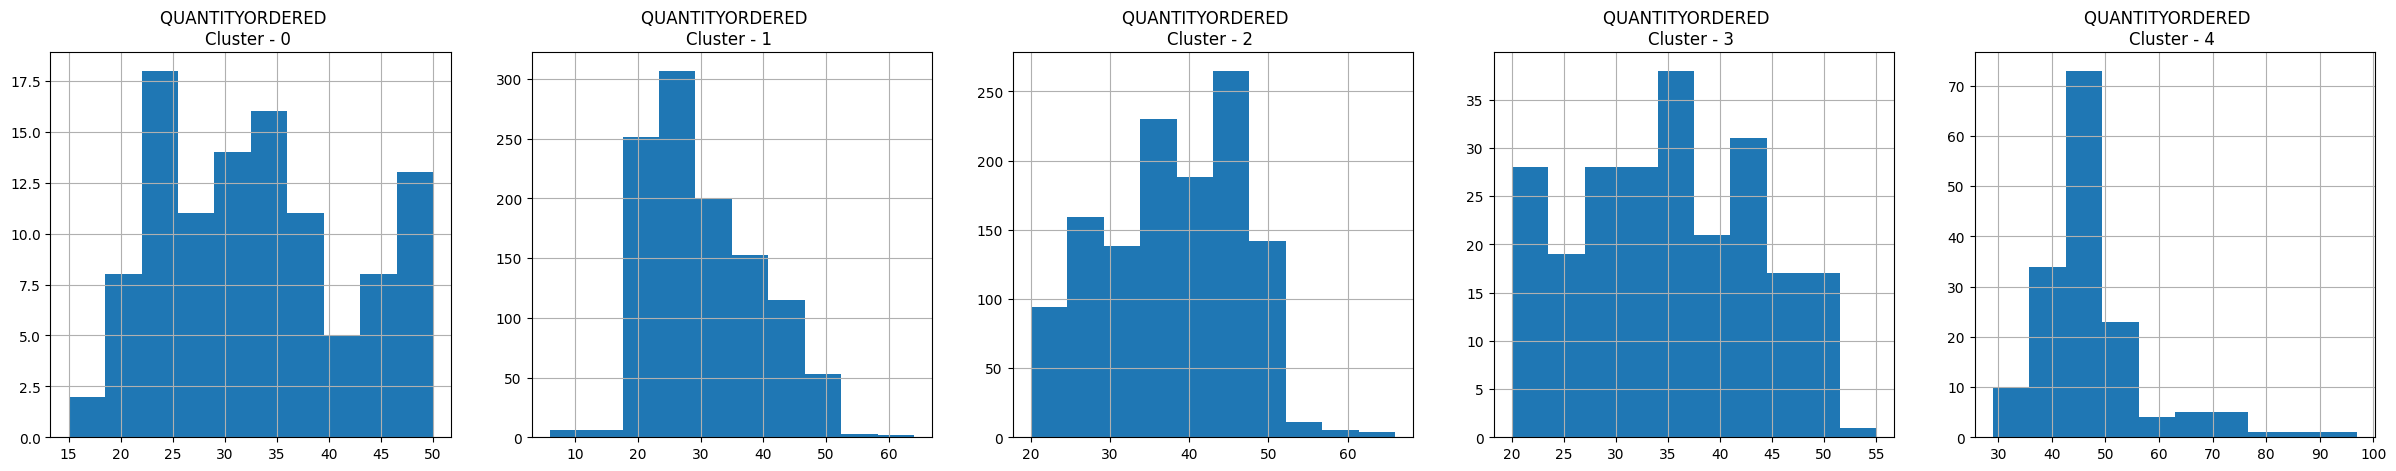

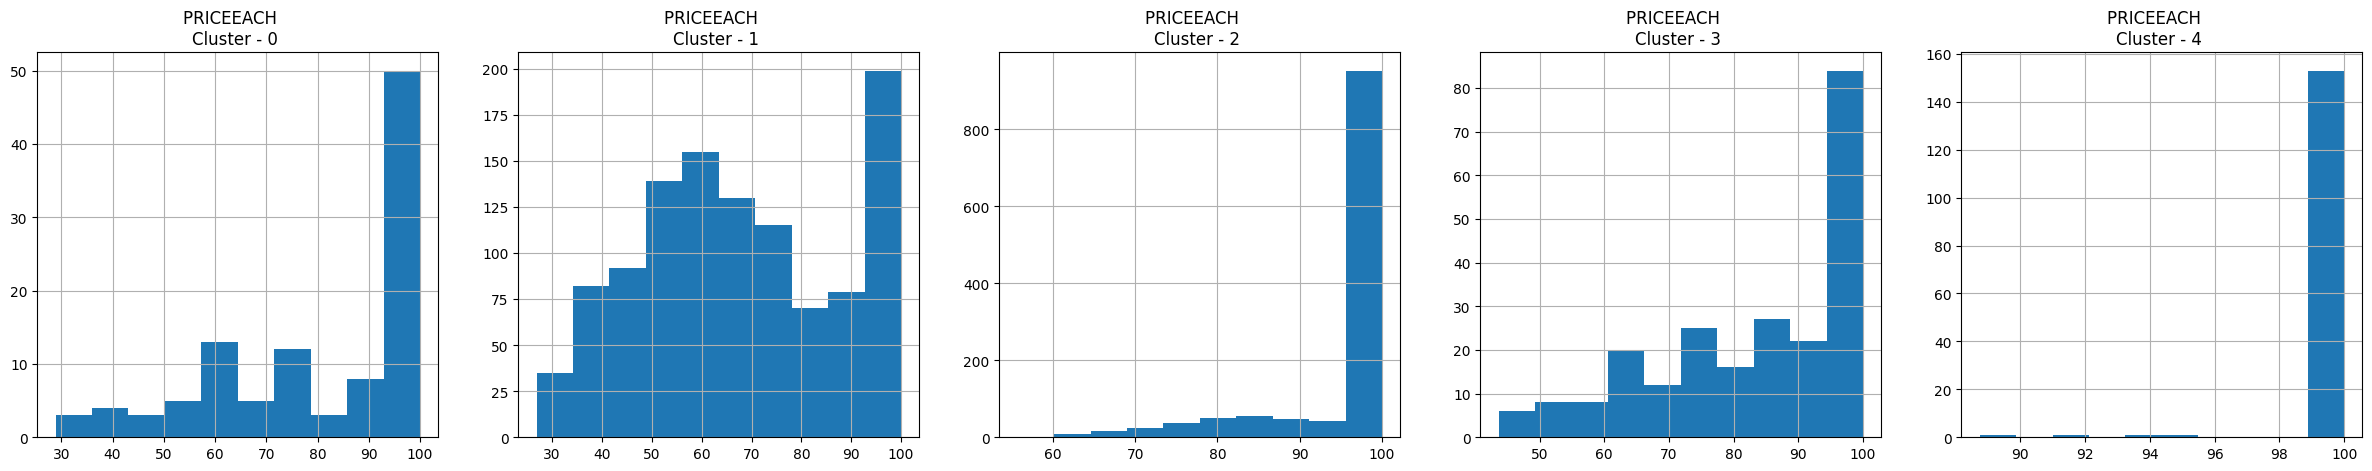

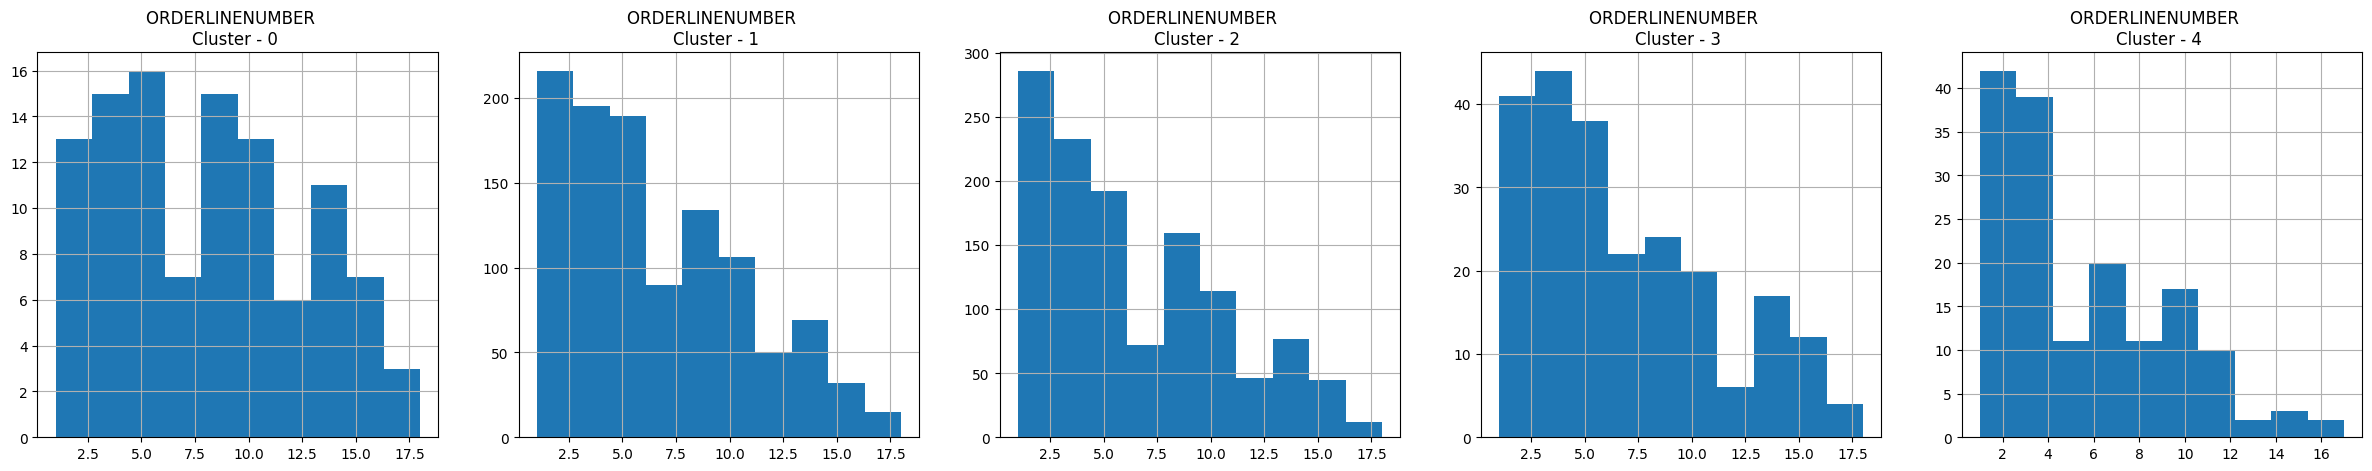

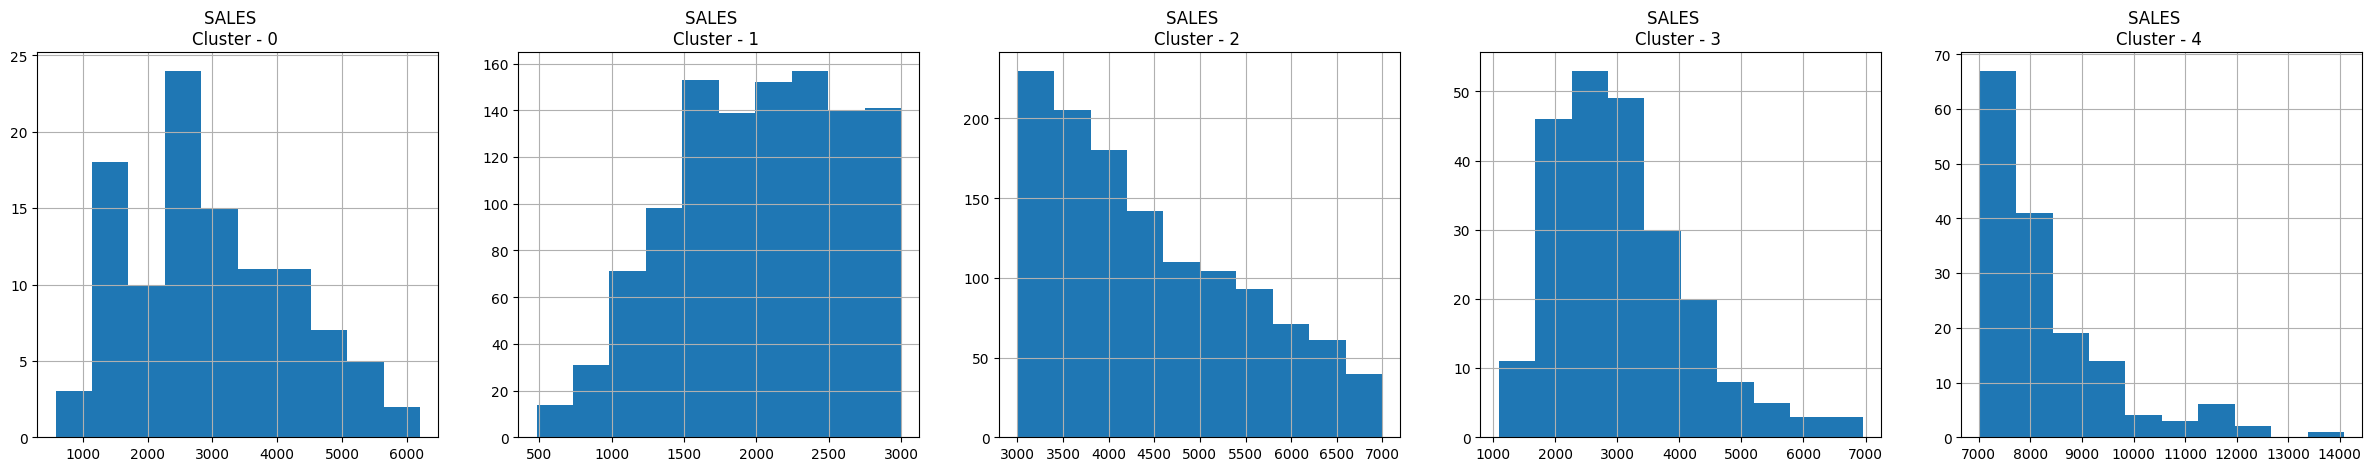

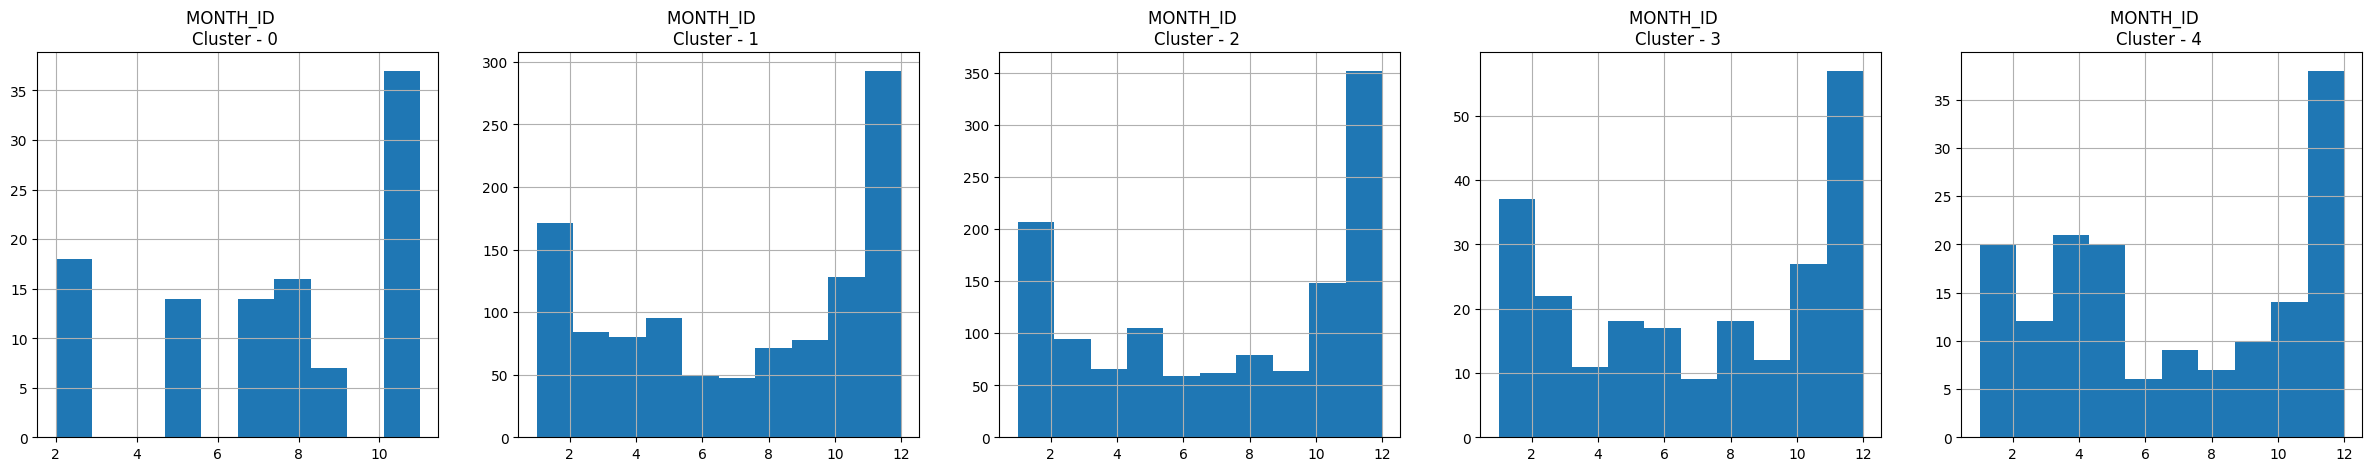

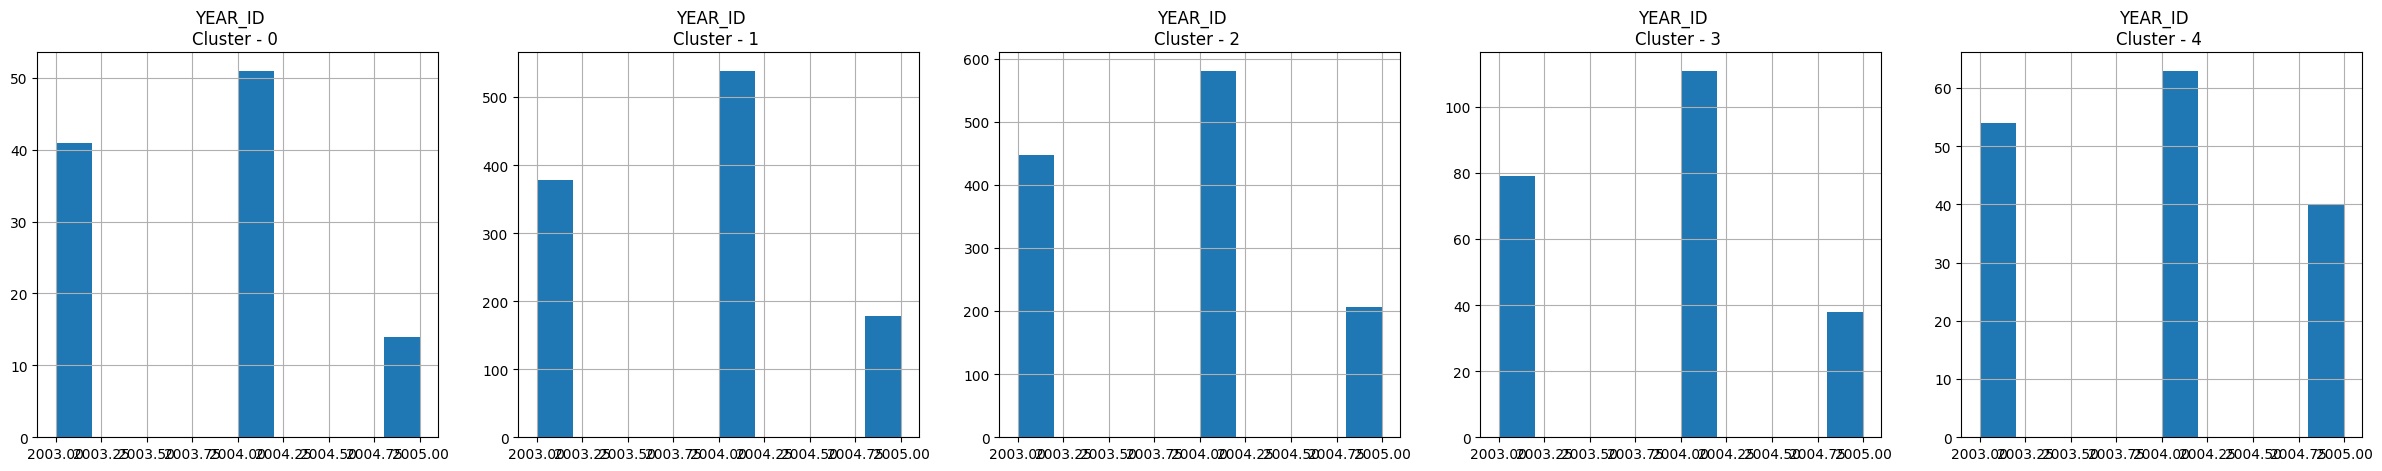

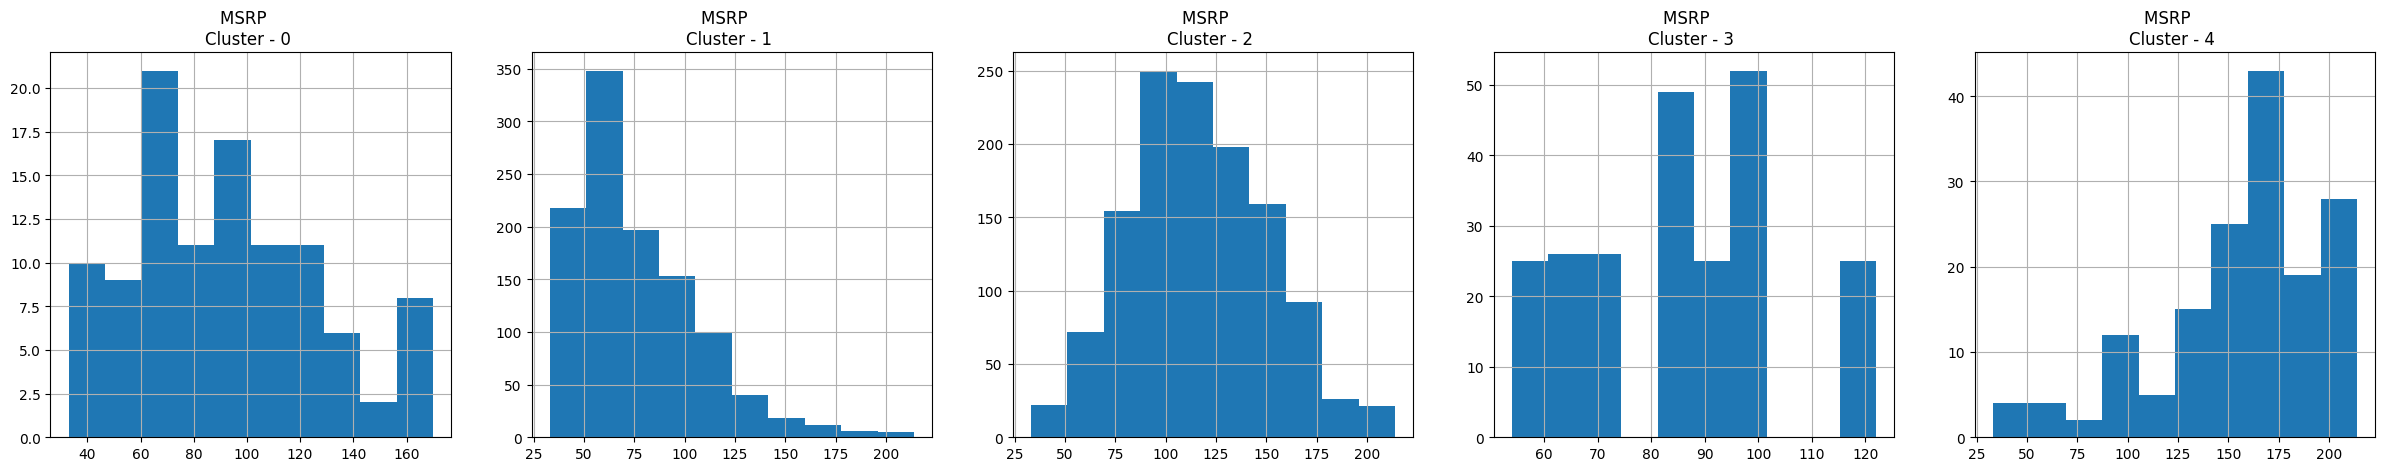

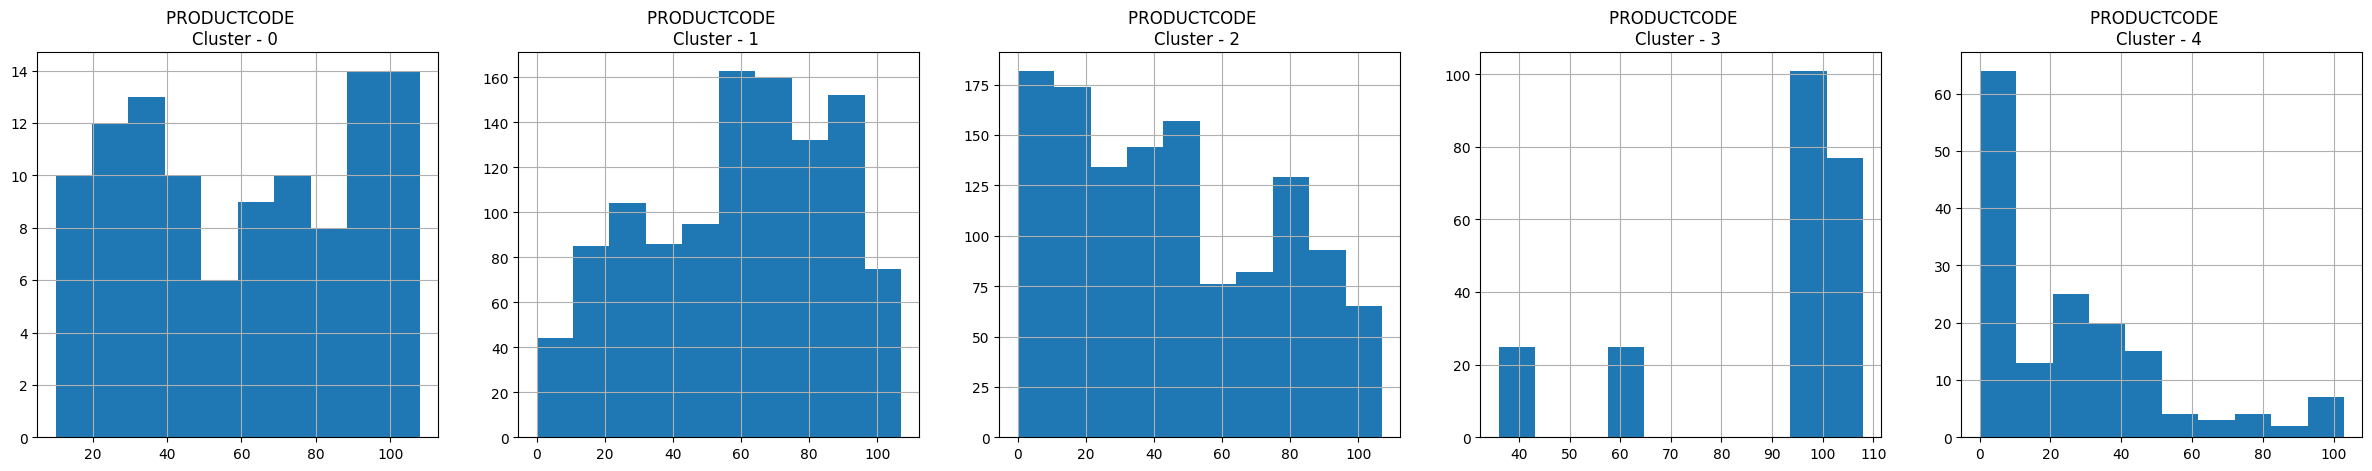

In [ ]:
#Plot histograms for each feature based on the corresponding cluster
for i in sales.columns[:8]:
  plt.figure(figsize = (30, 5))
  for j in range(5):
    plt.subplot(1, 5, j+1)
    cluster = sales_cluster[sales_cluster['Cluster'] == j]
    cluster[i].hist()
    plt.title('{}   \nCluster - {} '.format(i,j))

plt.show()

So, we get the distribution of each cluster separately. Let's explore some of them.
For example, in the case of PRICEEACH, most samples lie within the highest price range. Therefore, this specific group of customers tend to purchase items with the highest price range.

In the case of the months, customers tend to purchase more during the beginning and end months of the year, although they remain active throughout the months.

In the case of MSRP, data is skewed towards instances with high MSRP.

In the case of PRODUCTCODE, codes can be categorized as per their price and activity.

Let's assess the lowest cluster. Lower price contributes to lower quantity ordered, contributing to the lowest amount of sales. Here customers purchase items particularly during the holiday season at the end of the year. We can target lower priced products to this cluster of customers.

Now, we will apply an auto-encoder that encodes our data and performs K-Means algorithm to perform cleaner clusters and more consistent clusters.

#Part 8: Apply Principal Component Analysis (PCA) to Perform Dimensionality Reduction and Visualize Results

PCA is an unsupervised ML algorithm which performs dimensionality reduction while ensuring that the original information/essence of the data remains unchanged.

PCA tries to find a new set of features, called components, which are composites of the given input features that are uncorrelated.

PCA moves the data into a 2D component space from the original 3D data space. PCA reduces the amount of features by representing the data with less memory and computational requirements. It also ensures data confidentiality by encoding secret customer information.

In [ ]:
#Reduce original data to 3 dimensions using PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X)
pca_result

array([[-0.48626415, -1.19725795,  0.99255687],
       [-0.78454761, -1.02843315,  1.37654466],
       [ 1.43154551,  0.12418543,  0.2303282 ],
       ...,
       [ 0.38981747,  4.10336377, -0.0133528 ],
       [-2.78888006,  2.41383715,  1.53468677],
       [-0.70559259,  3.28317525, -0.49092195]])

In [ ]:
#Create a dataframe containing all the principle components along with the column names
pca_result = pd.DataFrame(data = pca_result, columns = ['pca1', 'pca2', 'pca3'])
pca_result.head()

,pca1,pca2,pca3
0,-0.486264,-1.197258,0.992557
1,-0.784548,-1.028433,1.376545
2,1.431546,0.124185,0.230328
3,1.288430,-0.252713,-0.581764
4,1.976048,-0.191371,-1.054726


In [ ]:
#concatenate the labels to the pca_result dataframe
pca_result = pd.concat([pca_result, pd.DataFrame({'Cluster':labels})], axis=1)
pca_result

,pca1,pca2,pca3,Cluster
0,-0.486264,-1.197258,0.992557,1
1,-0.784548,-1.028433,1.376545,1
2,1.431546,0.124185,0.230328,2
3,1.288430,-0.252713,-0.581764,2
4,1.976048,-0.191371,-1.054726,2
...,...,...,...,...
2818,-2.450254,1.085861,-1.460832,3
2819,-0.158341,3.775070,0.677687,3
2820,0.389817,4.103364,-0.013353,3
2821,-2.788880,2.413837,1.534687,3


In [ ]:
#Now, let's visualize the clusters in 3D using plotly express
fig = px.scatter_3d(pca_result, x='pca1', y='pca2', z='pca3', color='Cluster',symbol = 'Cluster', size_max = 18, opacity = 0.7)
fig.update_layout(margin = dict(l = 0, r = 0, b = 0, t = 0))
fig.show()
#

#Part 9: Autoencoders
Autoencoders are a kind of Artificial Neural Networks that perform data encoding or representation learning. They utilize the same input data for both input and output. So, we will feed our data into an autoencoder to encode our data and use that encoded data to train our K Means and principal components to perform clustering.

Autoencoders work by including a bottleneck that forces the network to generate an encoded/compressed version of the original input. If correlations exist between input data, autoencoders perform well. If the input data is independent, autoencoders do not work.

If the weights of the encoder and decoder are equal, we call these tied weights.

#Part 10: Perform Dimensionality Reduction Using Autoencoders
We will perform dimensionality reduction using autoencoders and then perform K-Means and PCA to drive the clustering process.


In [ ]:
sales.shape

(2823, 37)

In [ ]:
#We will build the encoder network and decoder network, combine them, and create our autoencoder
#We will build our encoder, which is a dense, fully connected artificial neural network

#Encoder:
input_data = Input(shape = (37,))
x = Dense(50, activation = 'relu')(input_data)
#glorot uniform draws samples from a uniform distribution with specified limits, instead of randomly drawinh eights.
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(100, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)

#Decoder:
x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
decoded = Dense(37, kernel_initializer = 'glorot_uniform')(x)

#autoencoder
autoencoder = Model(input_data, decoded)

#encoder for dimensionality reduction
encoder = Model(input_data, encoded)

#compile autoencoder model using adam optimizer
autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
#Fit the autoencoder model:
autoencoder.fit(sales, sales, epochs = 500, batch_size = 128, verbose = 3)

Epoch 1/500
Epoch 2/500
Epoch 3/500
Epoch 4/500
Epoch 5/500
Epoch 6/500
Epoch 7/500
Epoch 8/500
Epoch 9/500
Epoch 10/500
Epoch 11/500
Epoch 12/500
Epoch 13/500
Epoch 14/500
Epoch 15/500
Epoch 16/500
Epoch 17/500
Epoch 18/500
Epoch 19/500
Epoch 20/500
Epoch 21/500
Epoch 22/500
Epoch 23/500
Epoch 24/500
Epoch 25/500
Epoch 26/500
Epoch 27/500
Epoch 28/500
Epoch 29/500
Epoch 30/500
Epoch 31/500
Epoch 32/500
Epoch 33/500
Epoch 34/500
Epoch 35/500
Epoch 36/500
Epoch 37/500
Epoch 38/500
Epoch 39/500
Epoch 40/500
Epoch 41/500
Epoch 42/500
Epoch 43/500
Epoch 44/500
Epoch 45/500
Epoch 46/500
Epoch 47/500
Epoch 48/500
Epoch 49/500
Epoch 50/500
Epoch 51/500
Epoch 52/500
Epoch 53/500
Epoch 54/500
Epoch 55/500
Epoch 56/500
Epoch 57/500
Epoch 58/500
Epoch 59/500
Epoch 60/500
Epoch 61/500
Epoch 62/500
Epoch 63/500
Epoch 64/500
Epoch 65/500
Epoch 66/500
Epoch 67/500
Epoch 68/500
Epoch 69/500
Epoch 70/500
Epoch 71/500
Epoch 72/500
Epoch 73/500
Epoch 74/500
Epoch 75/500
Epoch 76/500
Epoch 77/500
Epoch 78

In [ ]:
#save autoencoder weights
autoencoder.save_weights('autoencoder_1.h5')

In [ ]:
#create predictions from encoder
predictions = encoder.predict(X)
predictions

89/89 [==============================] - 1s 10ms/step


array([[0.20061761, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.26795465, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.3454111 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00040642, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

<function matplotlib.pyplot.show(close=None, block=None)>

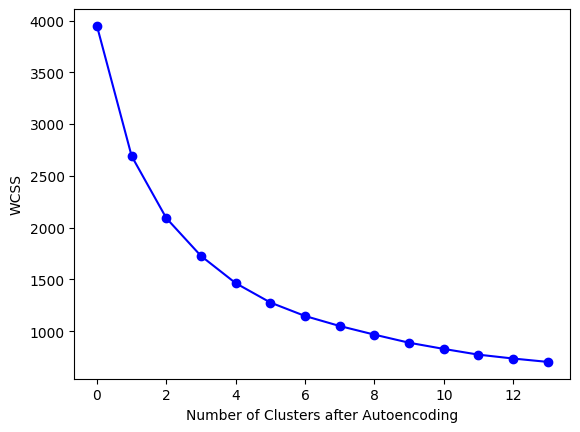

In [ ]:
#Now apply KMeans
scores = []
for k in range(1, 15): # Use the built-in range function
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(predictions)
    scores.append(kmeans.inertia_)

plt.plot(scores, 'bo-') # Use range here as well
plt.xlabel('Number of Clusters after Autoencoding')
plt.ylabel('WCSS')
plt.show

Now, we can confidently say that 3 clusters is good enough. Let's apply K-Means

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(predictions)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(X)
#

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
#Creating a new dataframe with the new labels concatenated to our original data frame
clustered_data = pd.concat([sales, pd.DataFrame({'Cluster':labels})], axis=1)
clustered_data.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,...,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small,Cluster
0,30,95.70,2,2871.00,2,2003,95,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,34,81.35,5,2765.90,5,2003,95,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,41,94.74,2,3884.34,7,2003,95,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,45,83.26,6,3746.70,8,2003,95,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,49,100.00,14,5205.27,10,2003,95,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [ ]:
centroids = pd.DataFrame(data = kmeans.cluster_centers_, columns = sales.columns)
centroids
#

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,1.245428,0.800220,-0.259579,2.573861,-0.088008,0.136857,1.430265,-0.871802,-0.084647,0.043374,...,0.580097,0.011712,-0.164278,-0.300637,-0.128350,-0.201008,-0.151285,4.120788,-0.980703,-0.91210
1,-0.468912,-0.724370,0.043454,-0.810304,0.007142,-0.003285,-0.581757,0.285478,0.025174,-0.016801,...,-0.162957,0.013781,0.072858,0.058660,0.071986,-0.044714,0.087993,-0.242672,-0.980703,1.09637
2,0.293073,0.580208,-0.010805,0.458608,0.003368,-0.012482,0.376634,-0.165542,-0.013717,0.010642,...,0.085141,-0.014094,-0.048853,-0.020232,-0.052121,0.064221,-0.064346,-0.242672,1.019676,-0.91210


In [ ]:
centroids = scaler.inverse_transform(centroids)
centroids = pd.DataFrame(data = centroids, columns = sales.columns)
centroids
#

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,47.222930,99.799554,5.369427,8293.753248,6.770701,2003.910828,158.184713,26.242038,0.044586,0.025478,...,0.617834,0.121019,0.057325,-6.938894e-17,0.006369,0.044586,0.152866,1.000000e+00,-7.216450e-16,1.387779e-15
1,30.525741,69.047496,6.649766,2061.682800,7.118565,2003.812793,77.340094,62.788612,0.071763,0.017161,...,0.265211,0.121685,0.131045,9.906396e-02,0.039002,0.092824,0.251170,6.869505e-16,-1.110223e-15,1.000000e+00
2,37.947254,95.361741,6.420520,4398.433699,7.104769,2003.806358,115.848988,48.545520,0.062139,0.020954,...,0.382948,0.112717,0.093208,7.731214e-02,0.018786,0.126445,0.188584,7.424616e-16,1.000000e+00,-3.885781e-16


From these centroids, we can make revised observations about the market and better tailor our marketing campaign.

<ipython-input-72-58e4dd523ede>:3: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



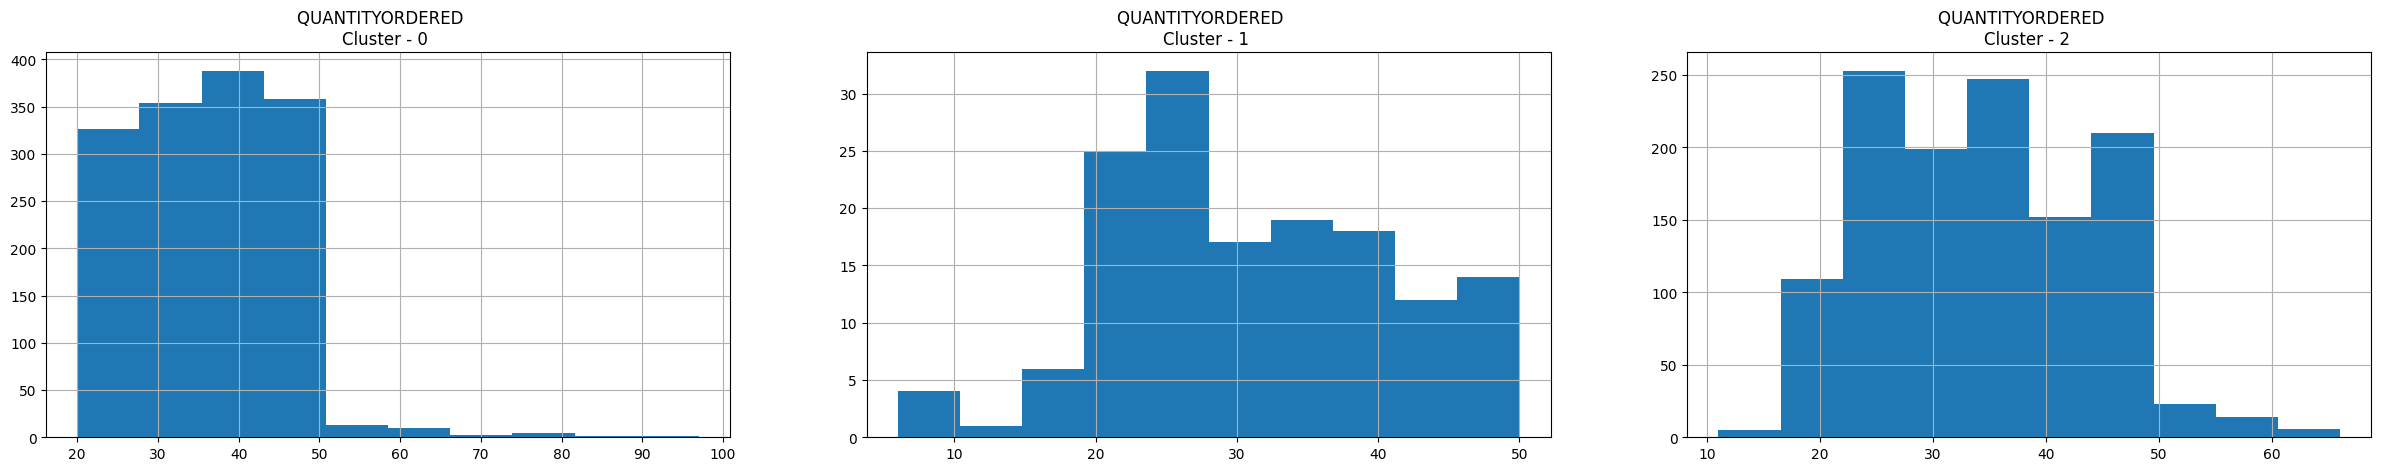

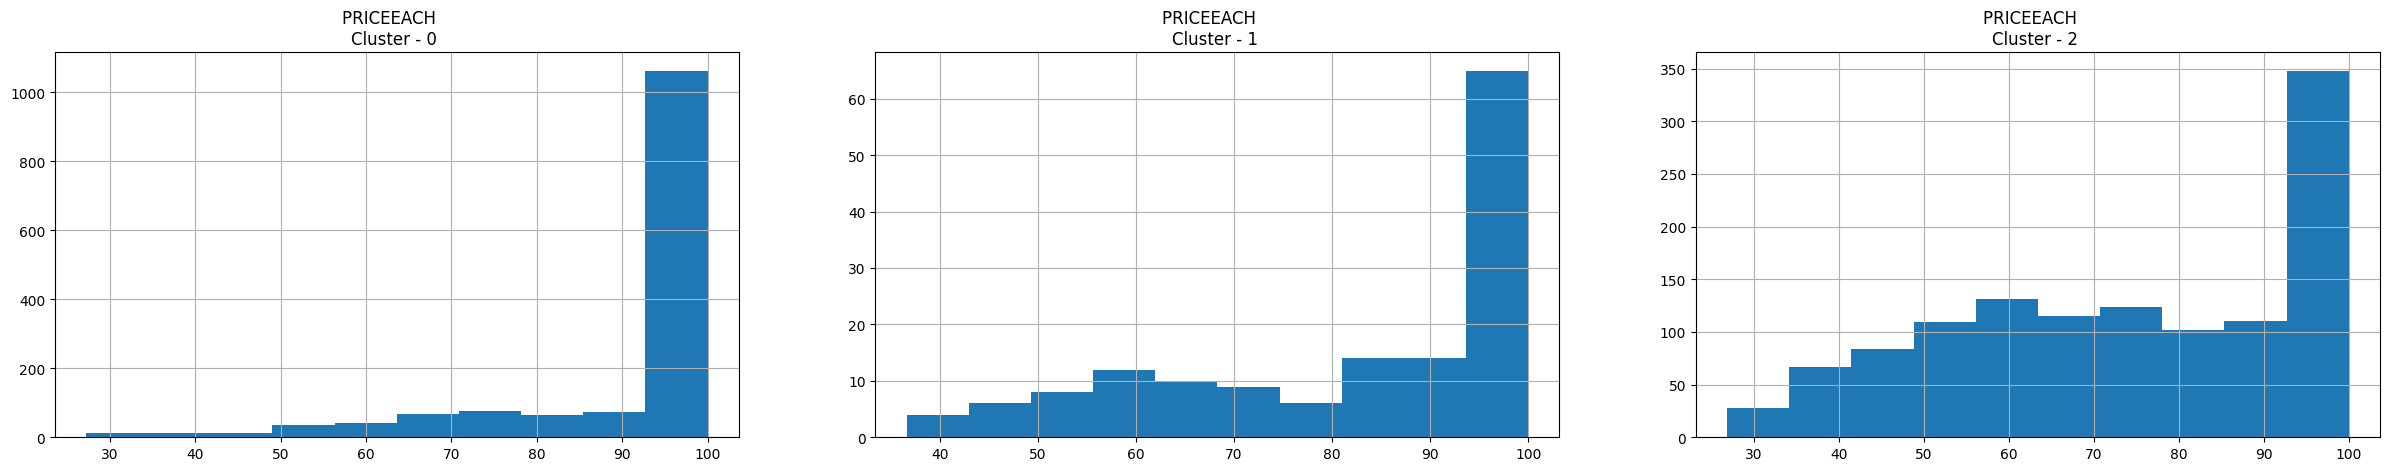

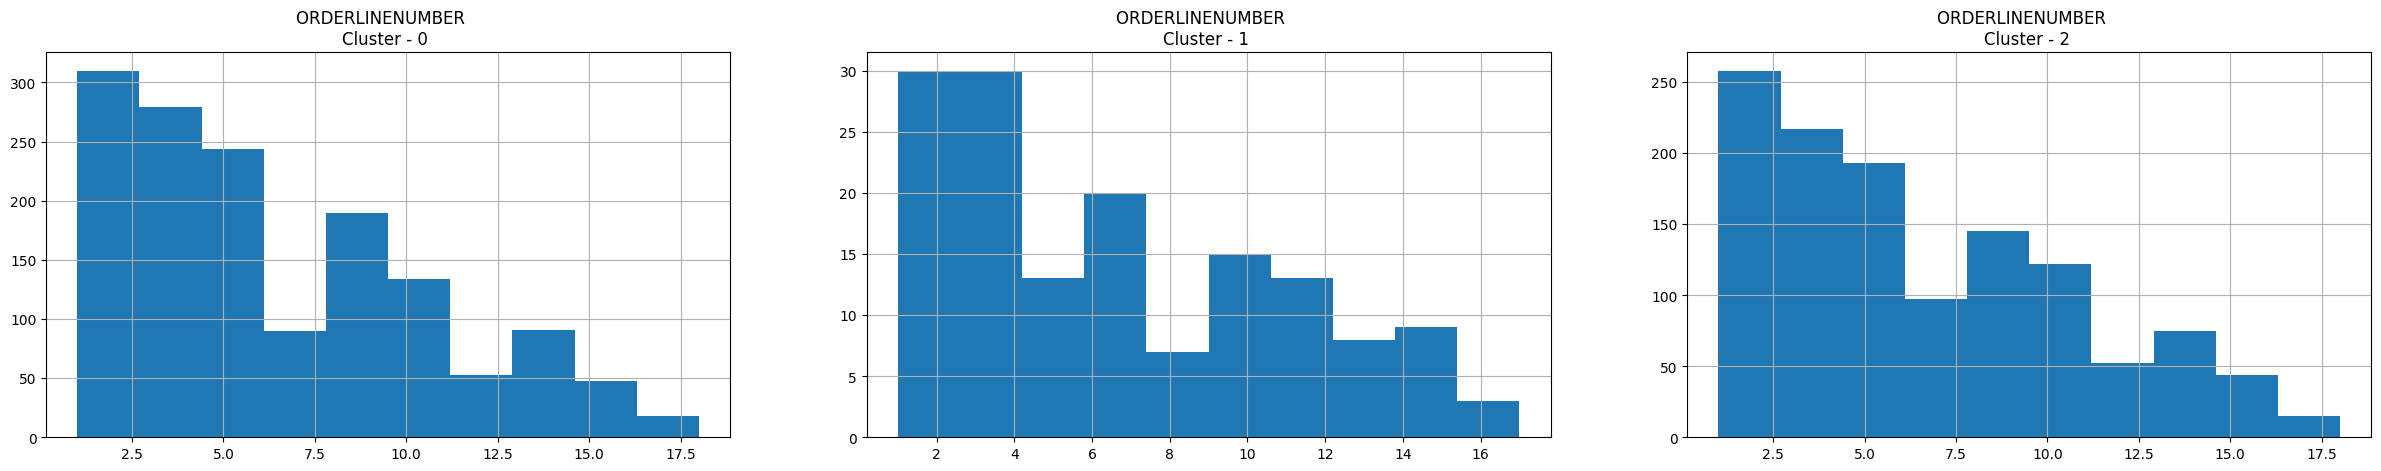

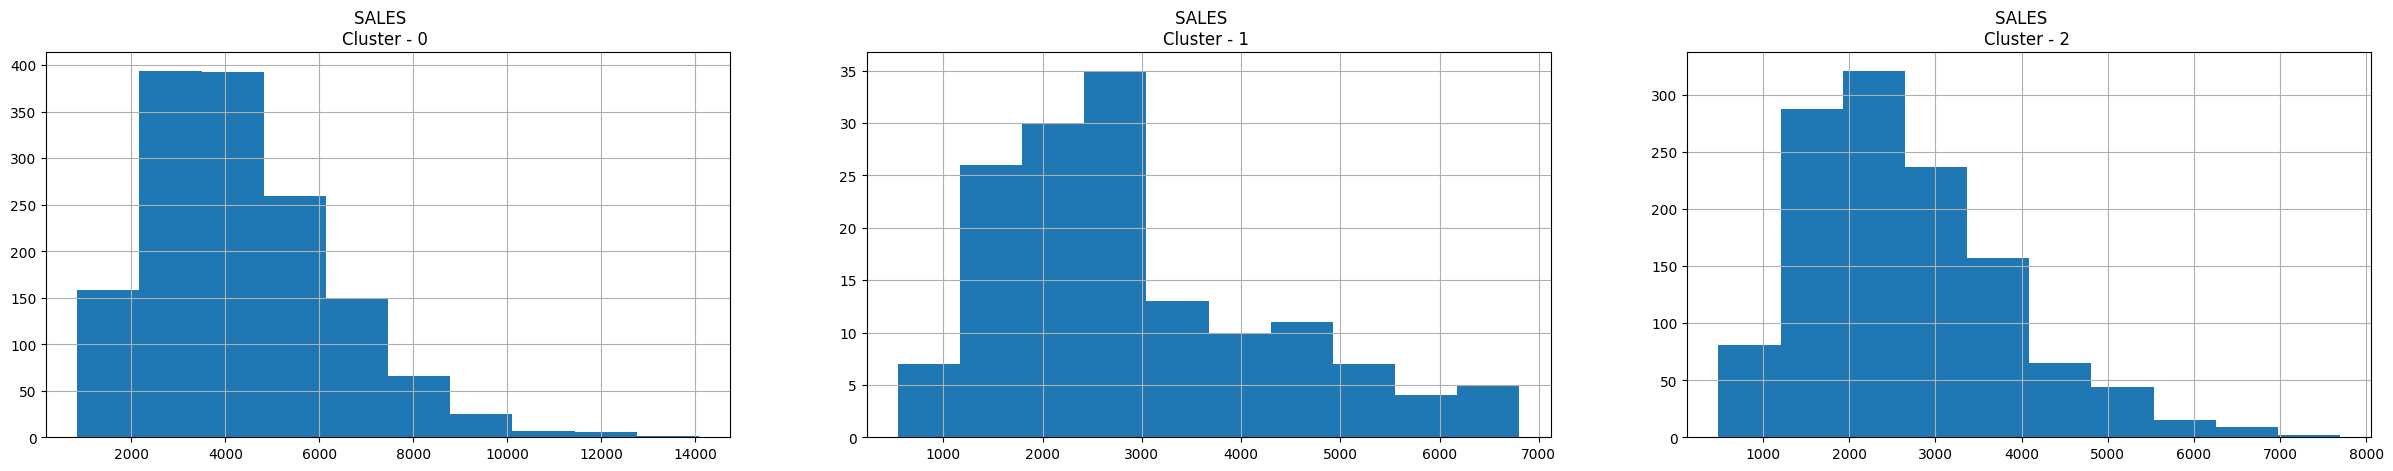

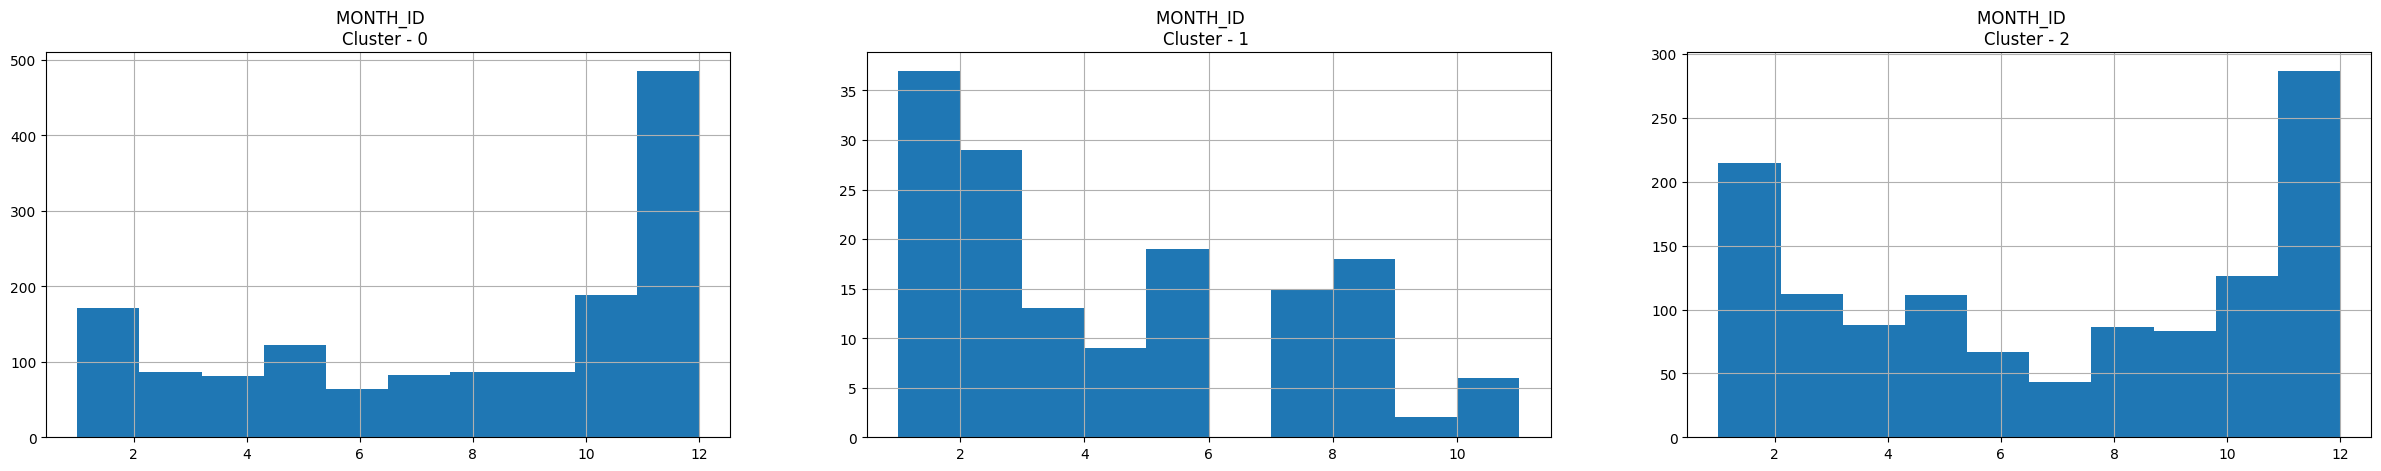

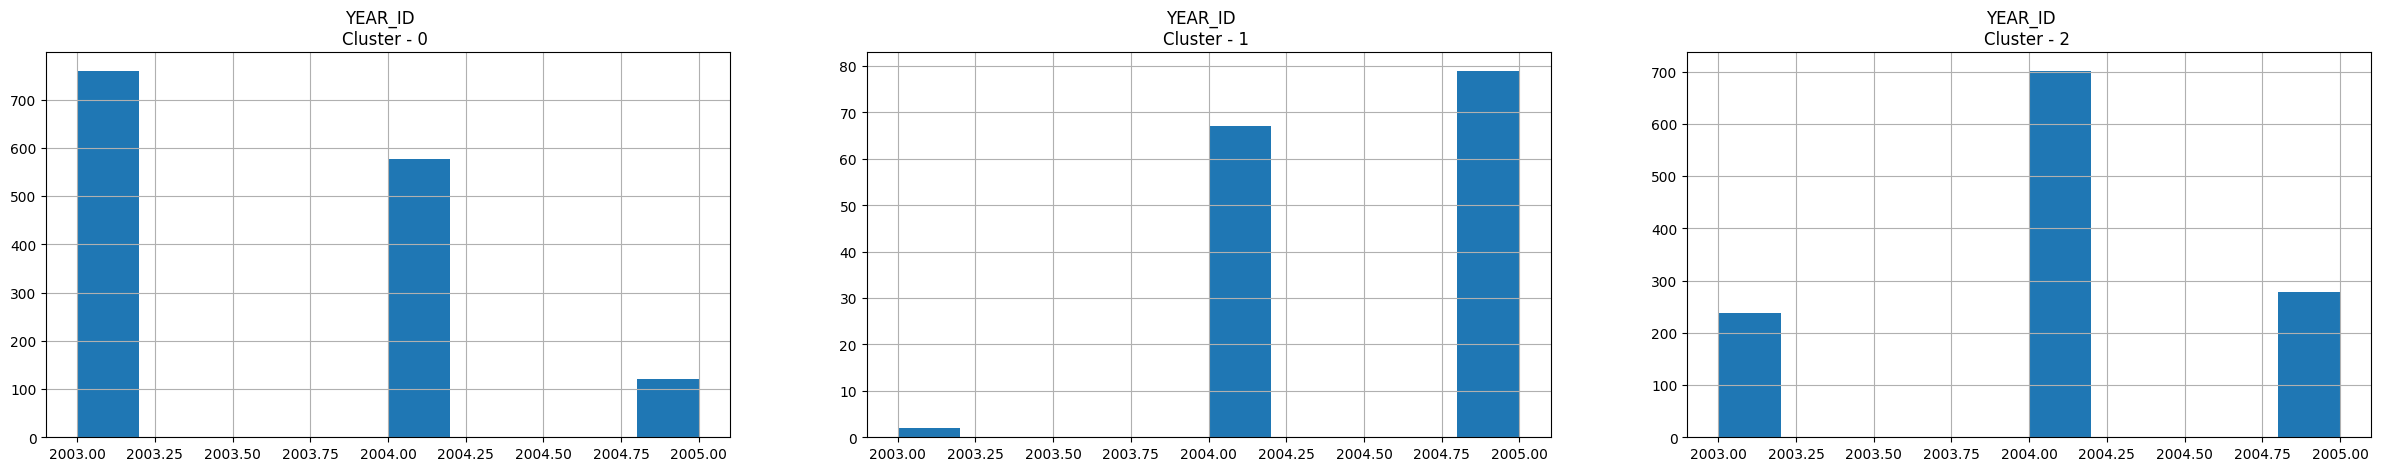

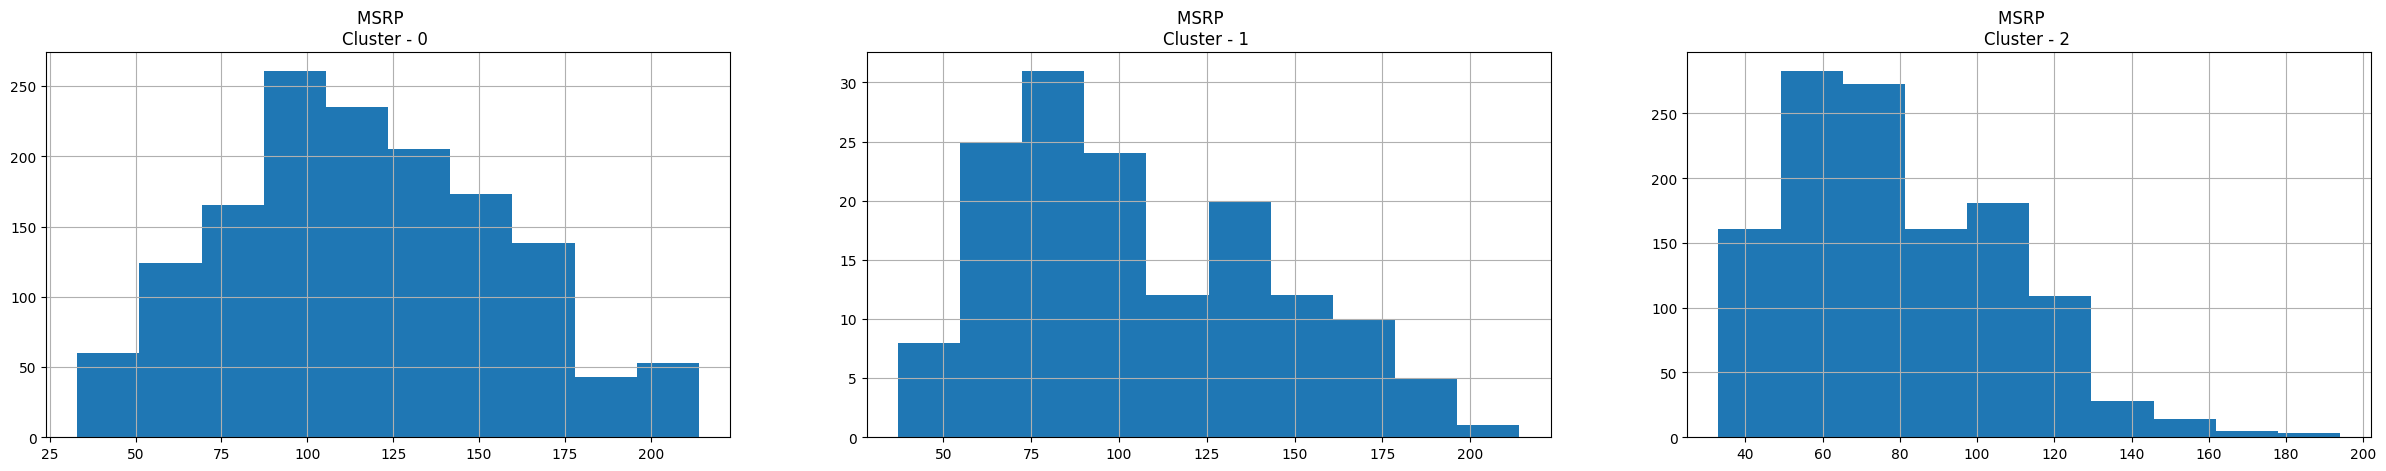

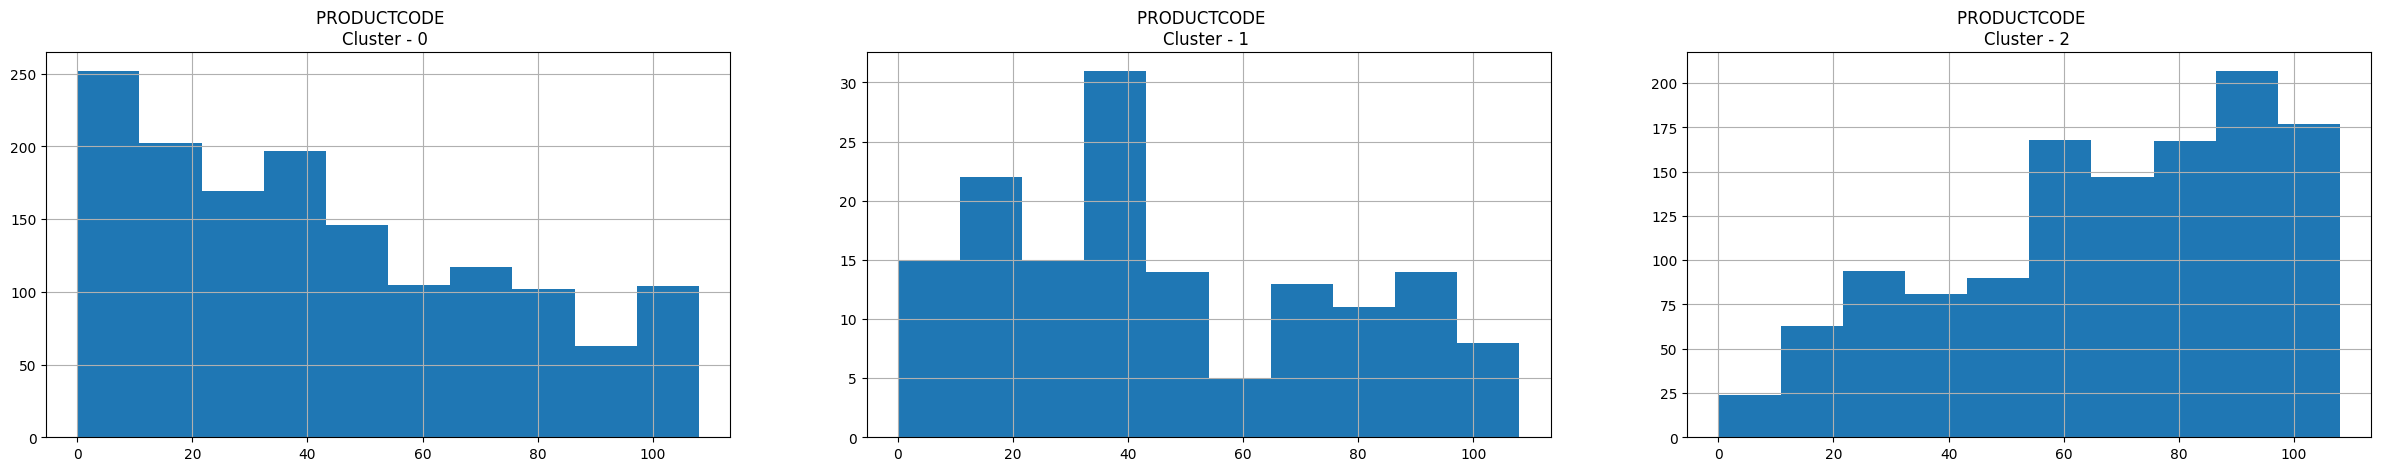

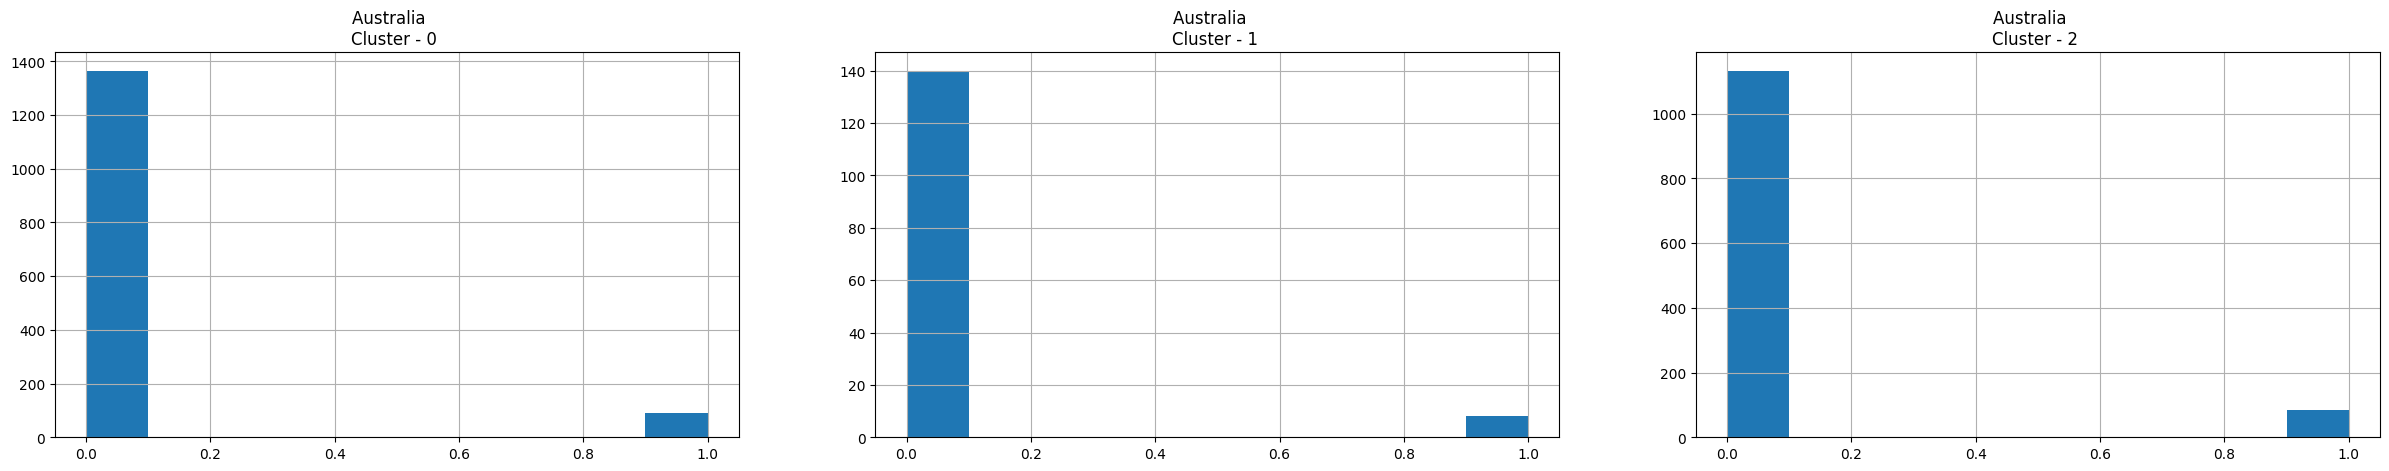

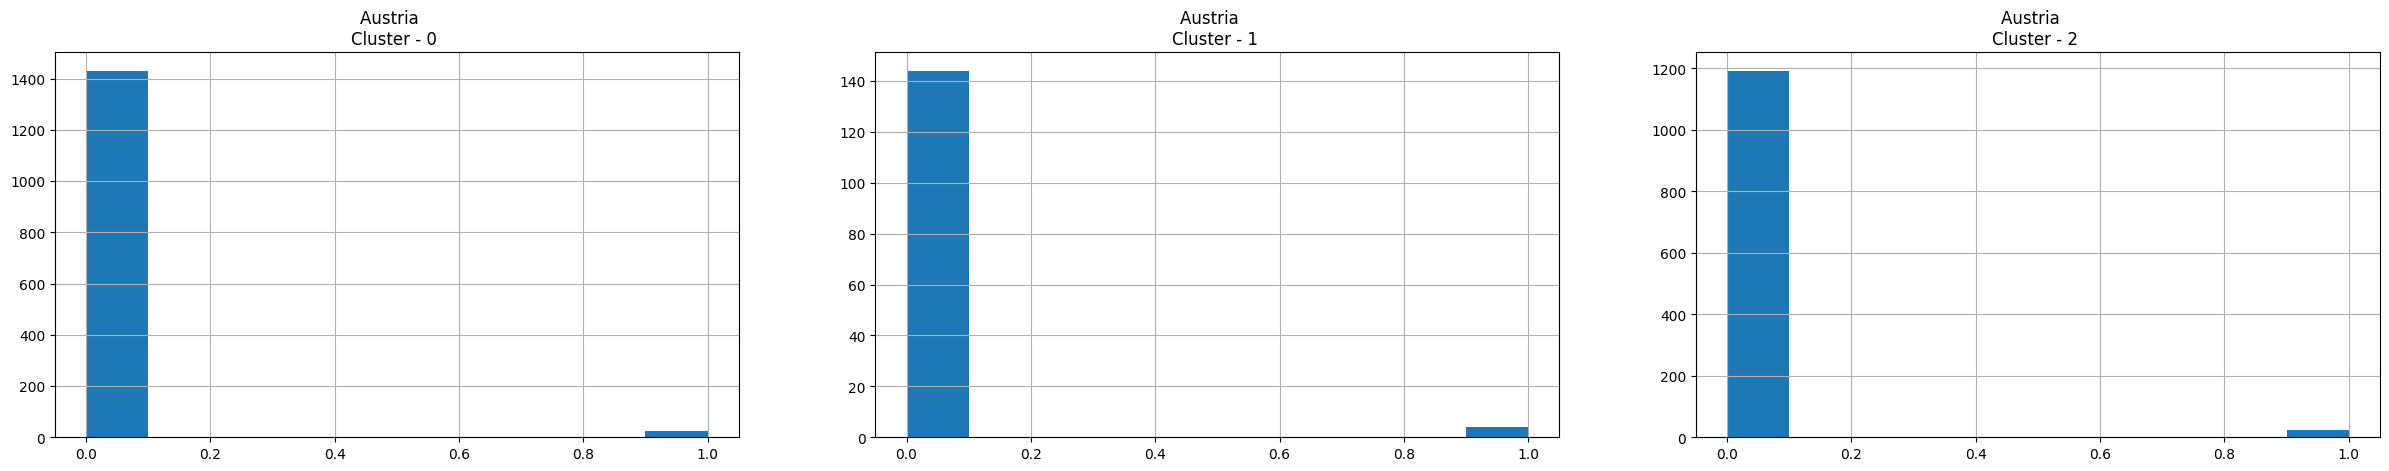

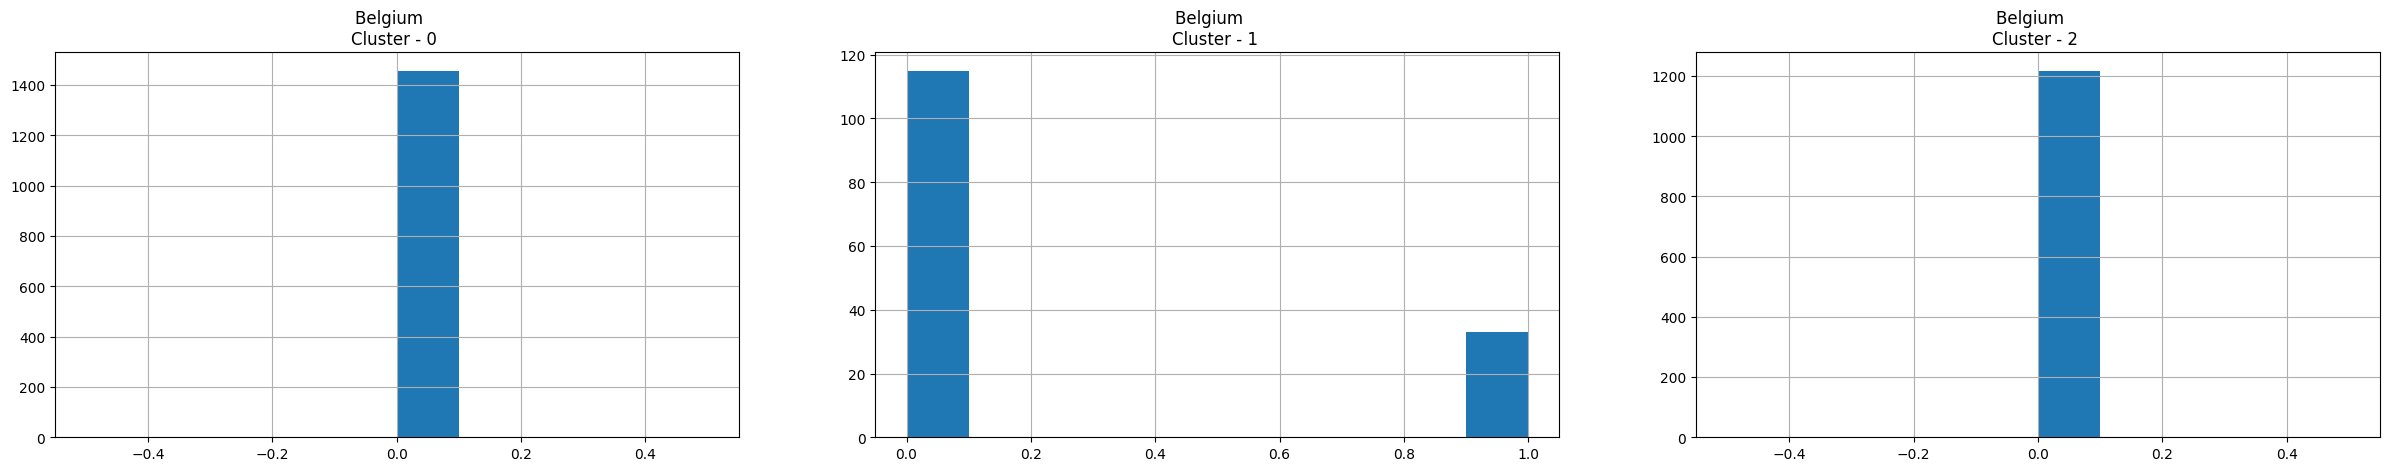

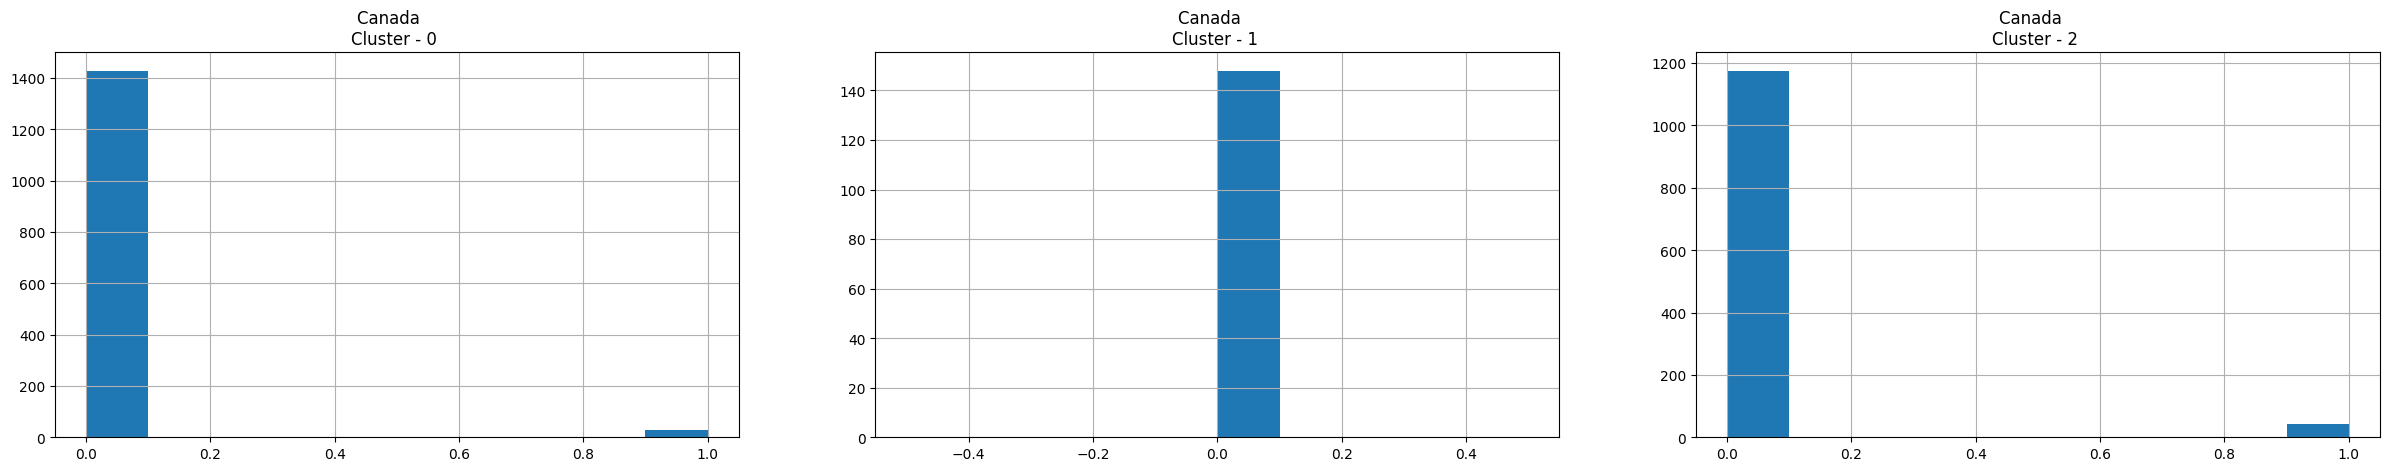

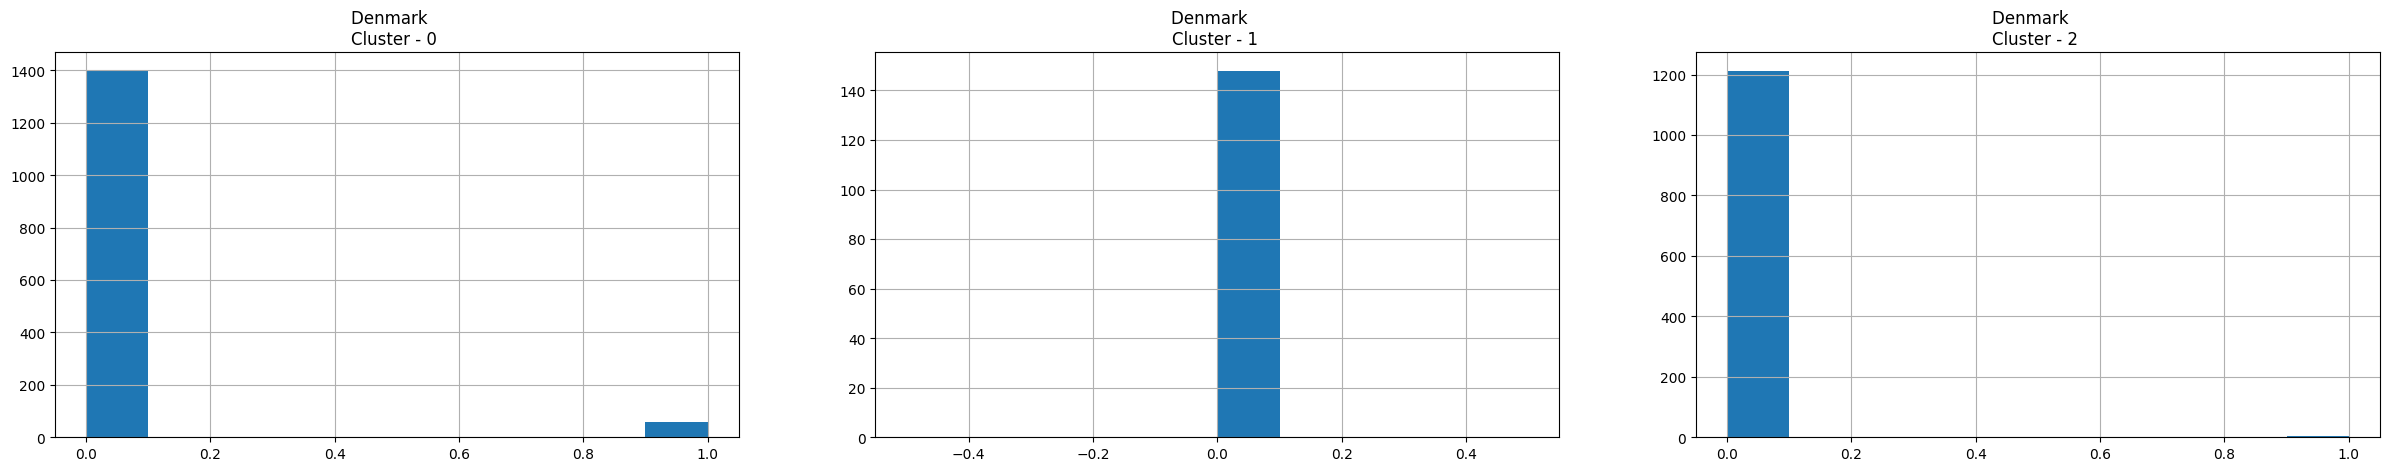

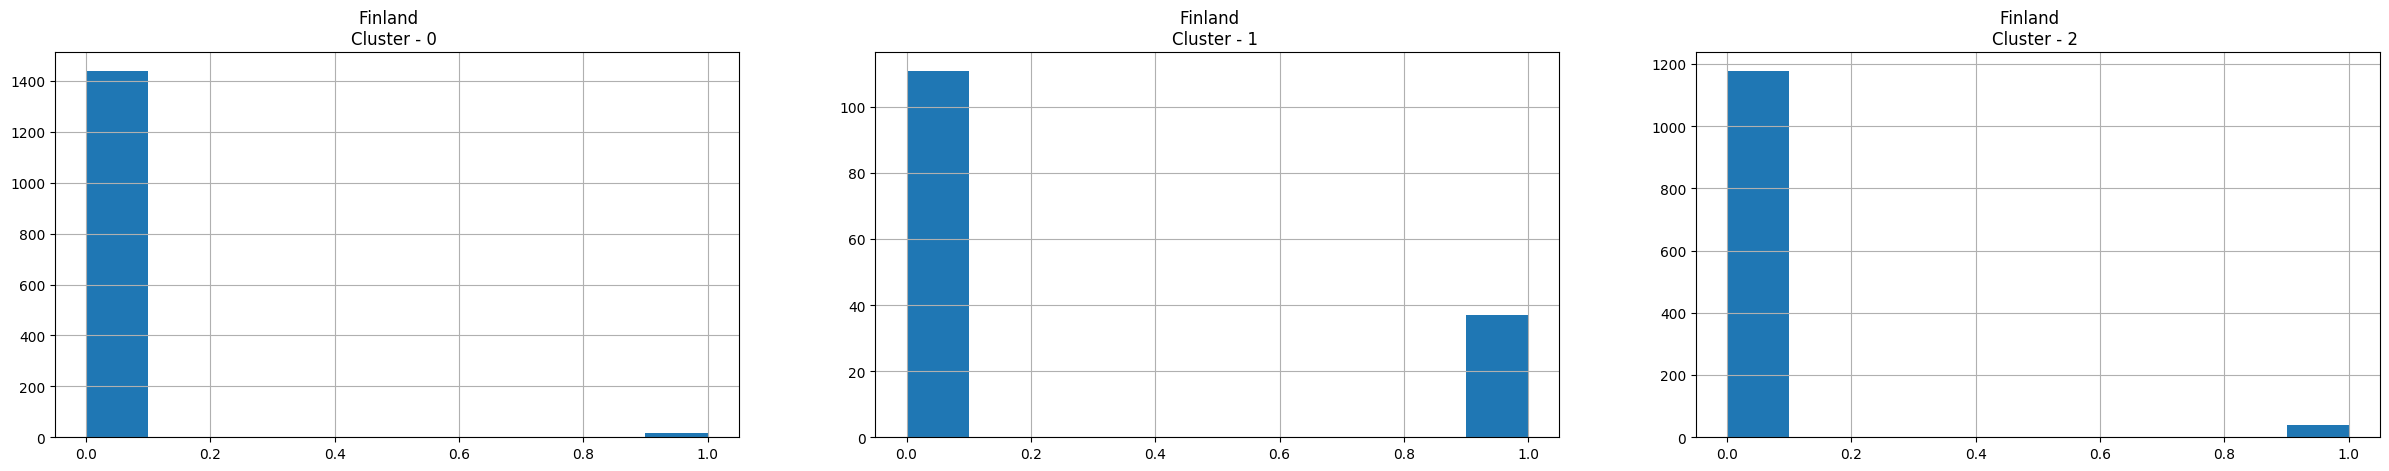

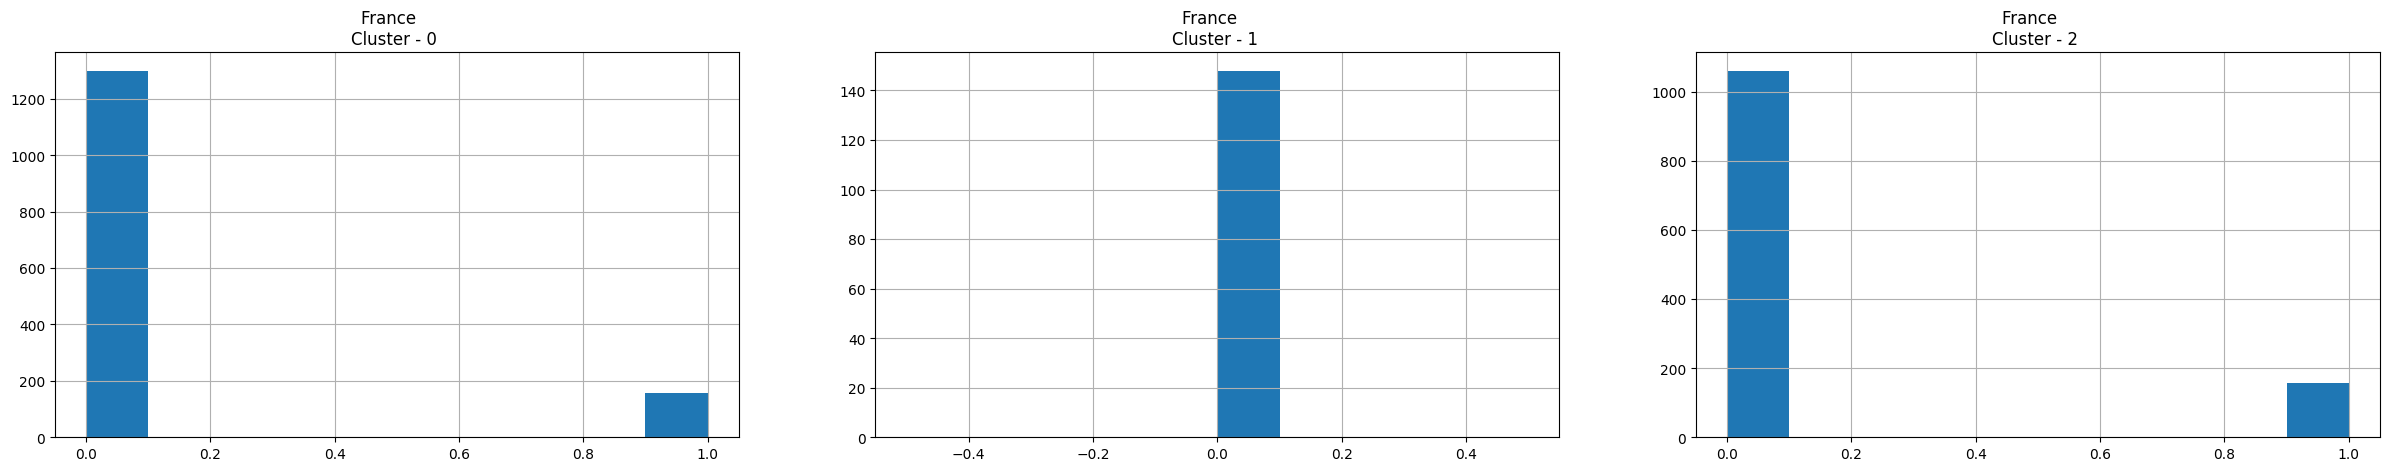

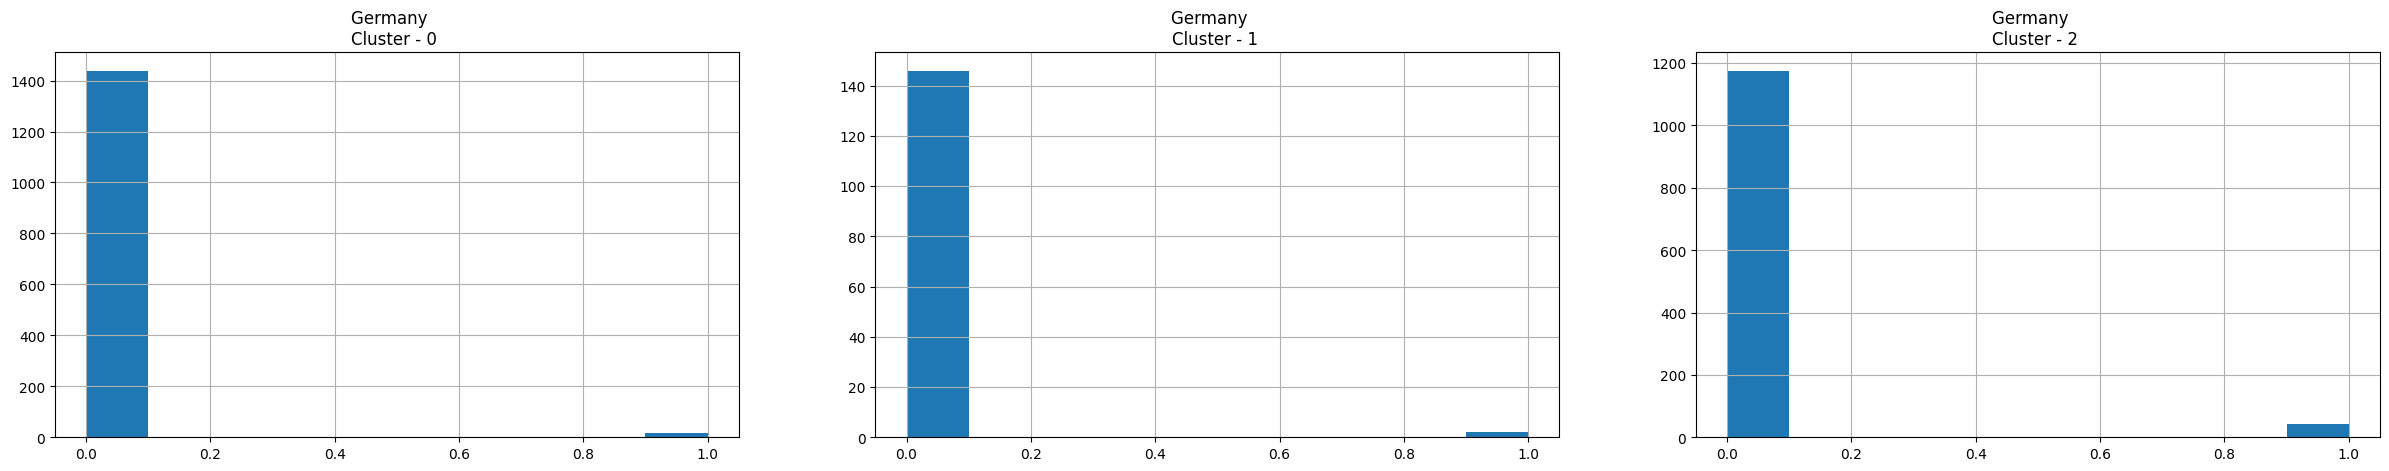

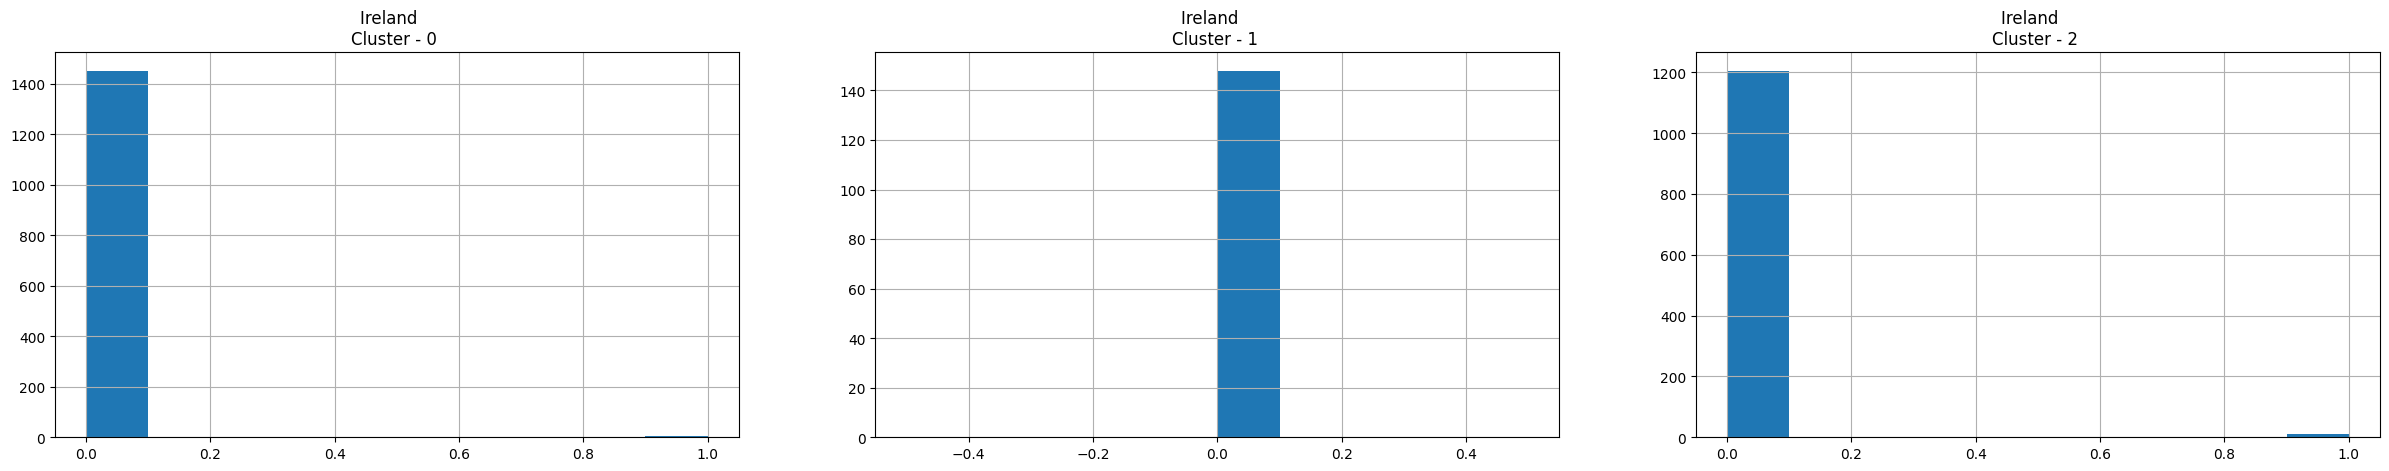

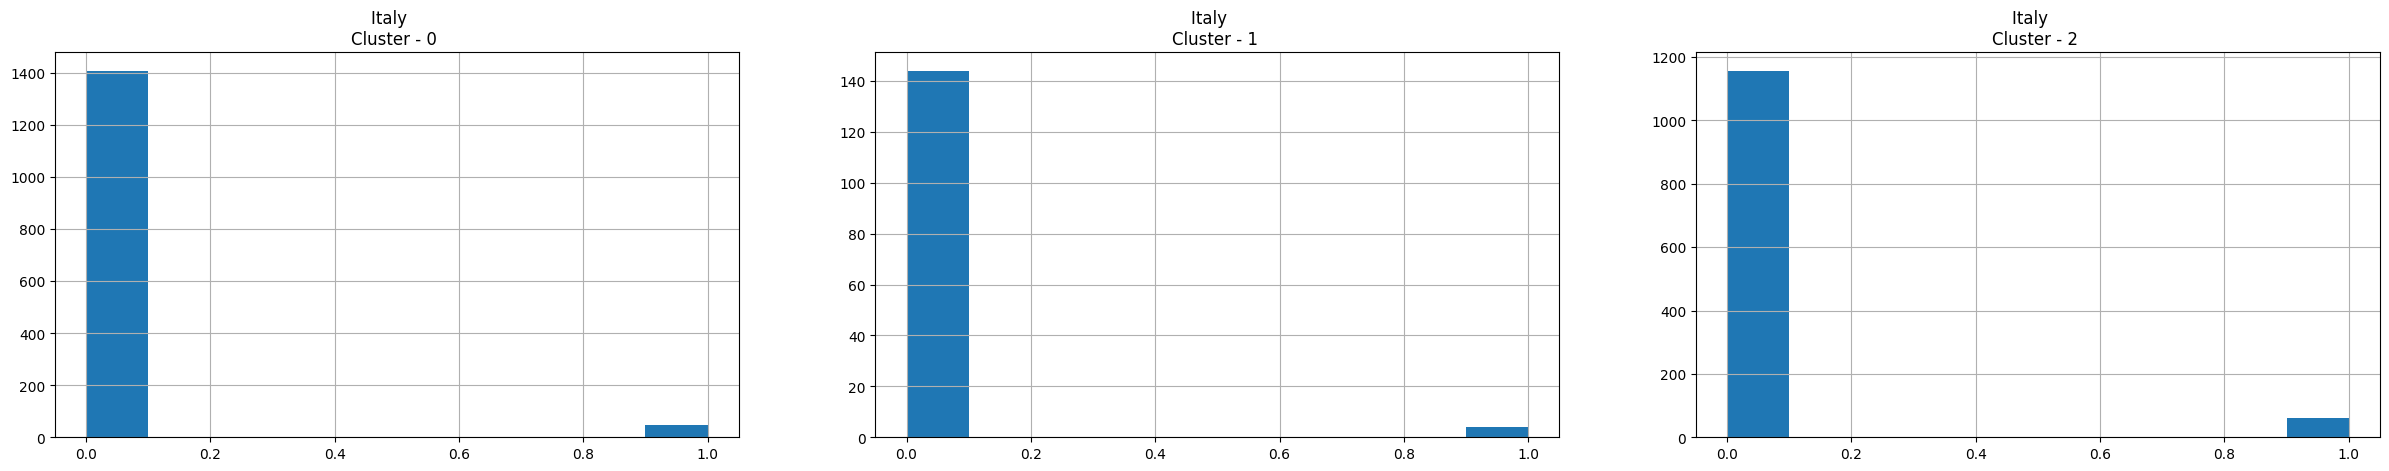

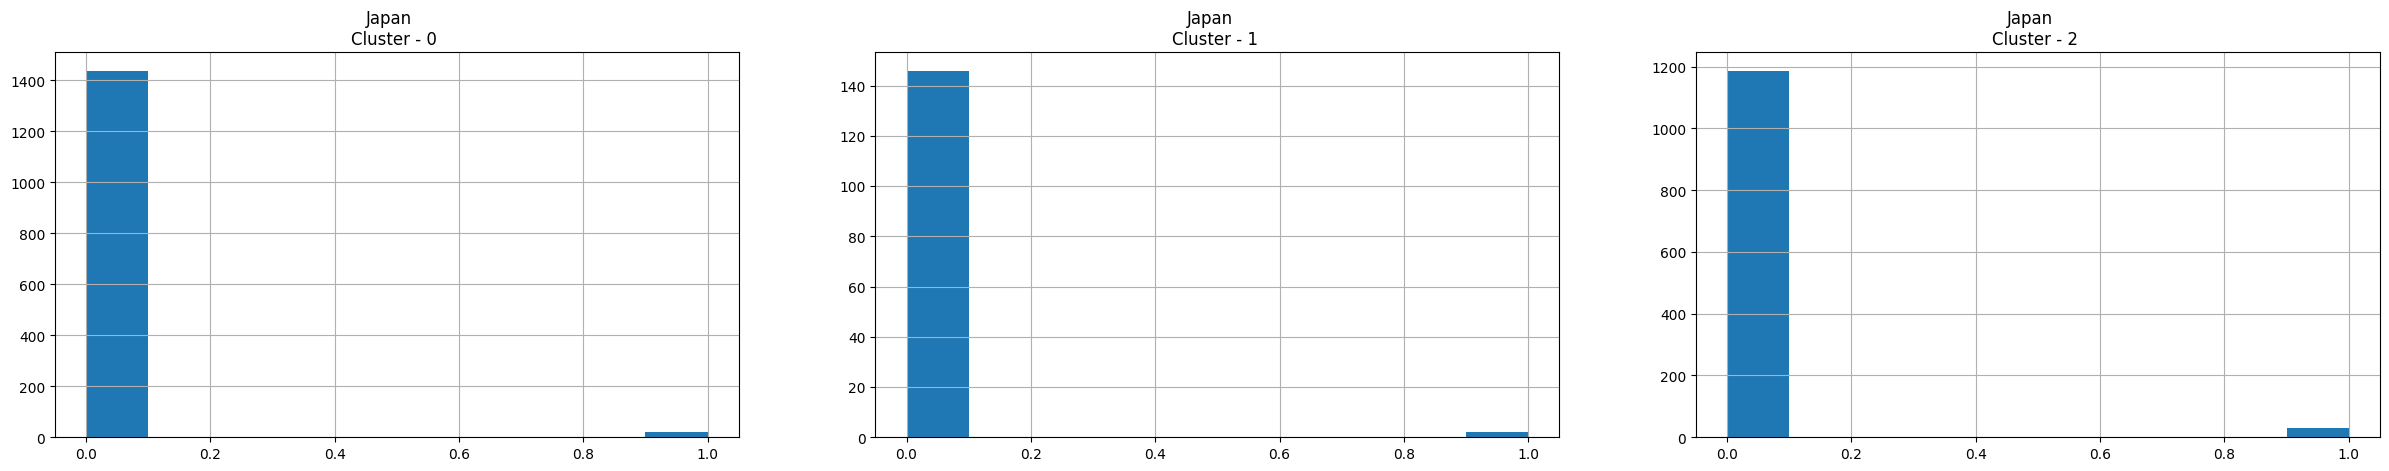

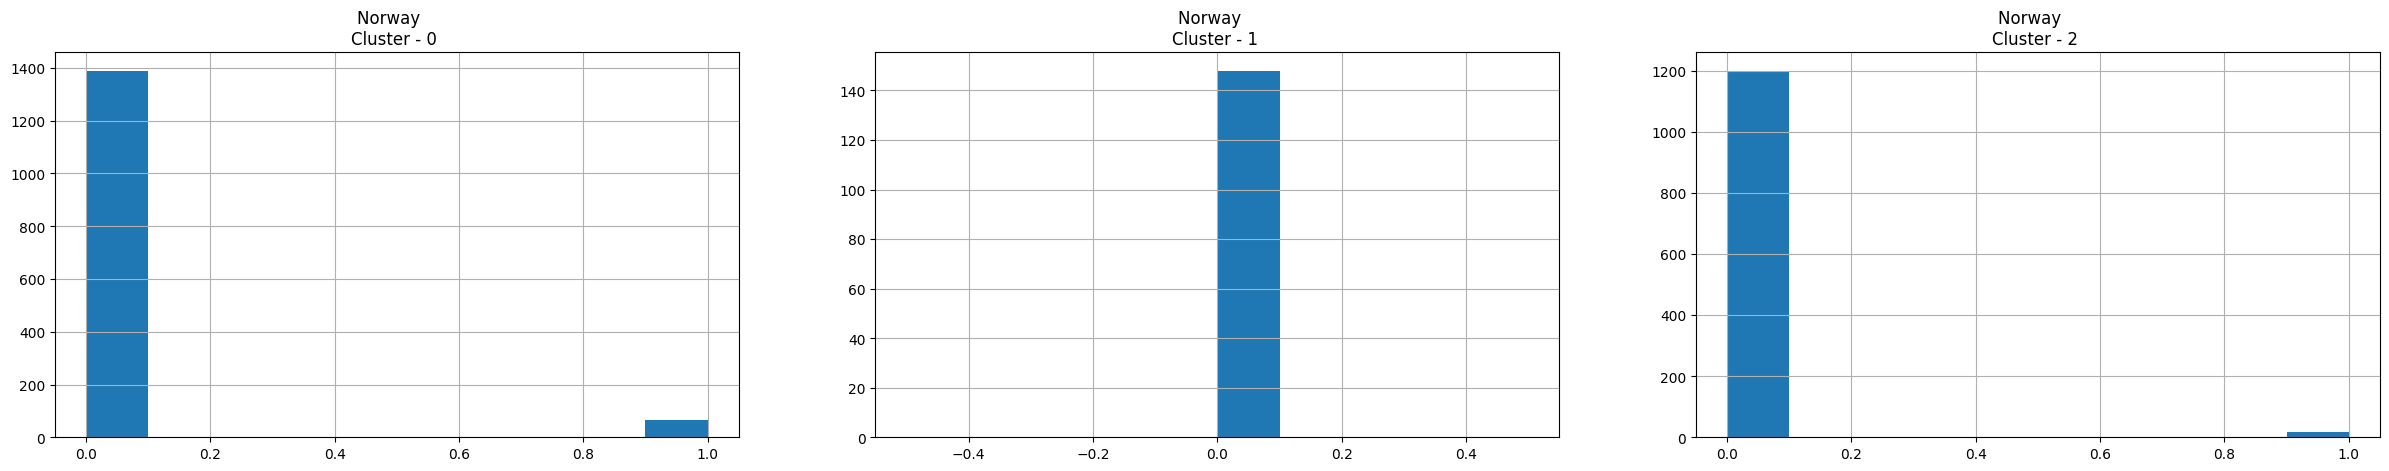

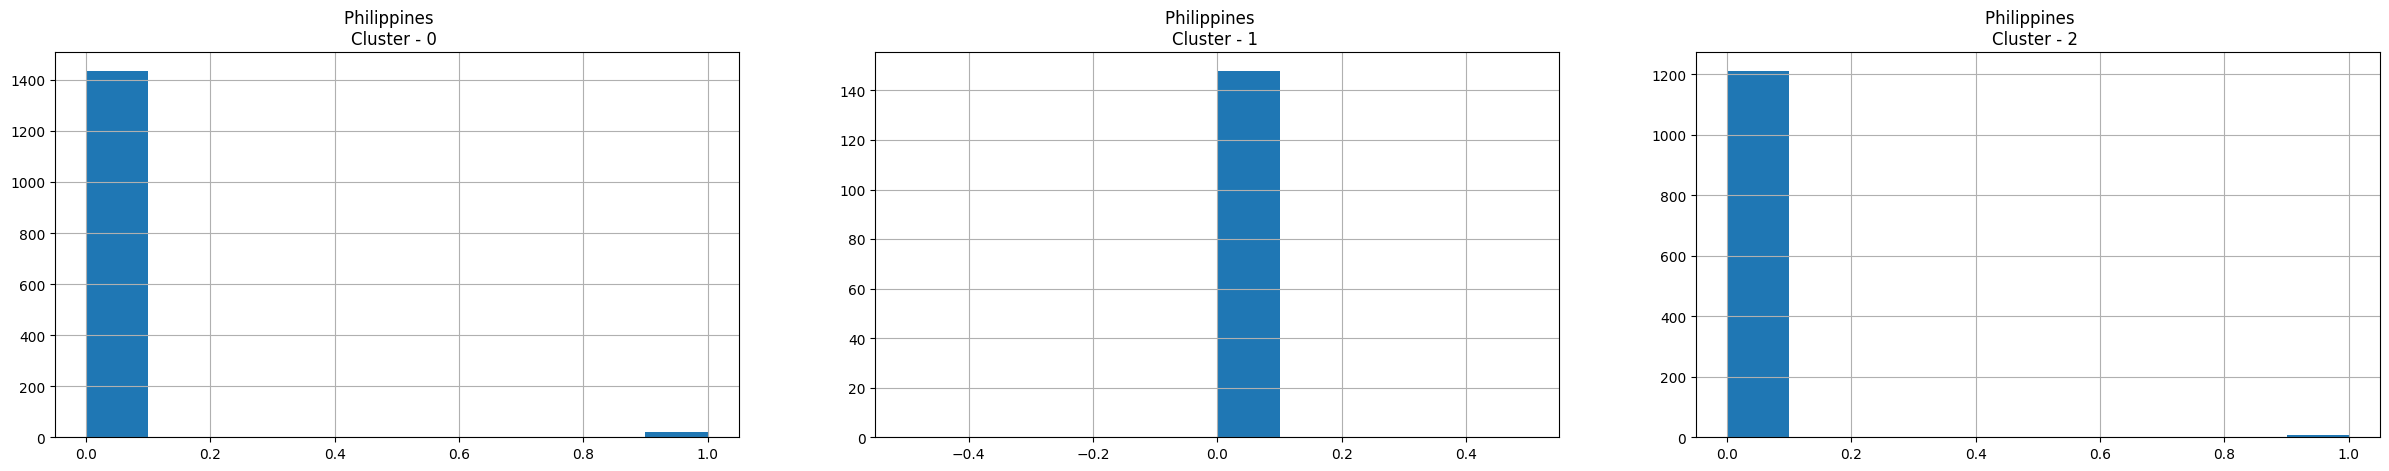

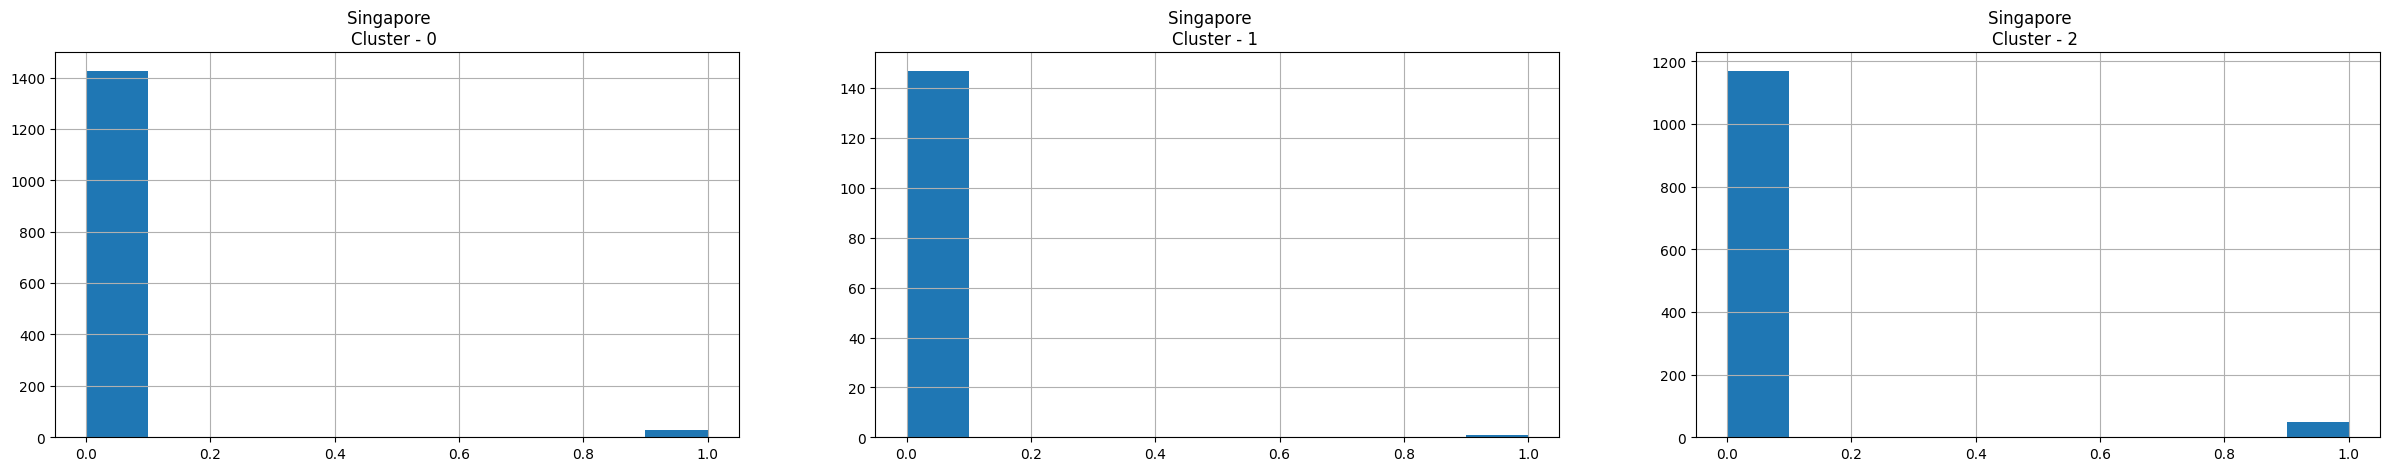

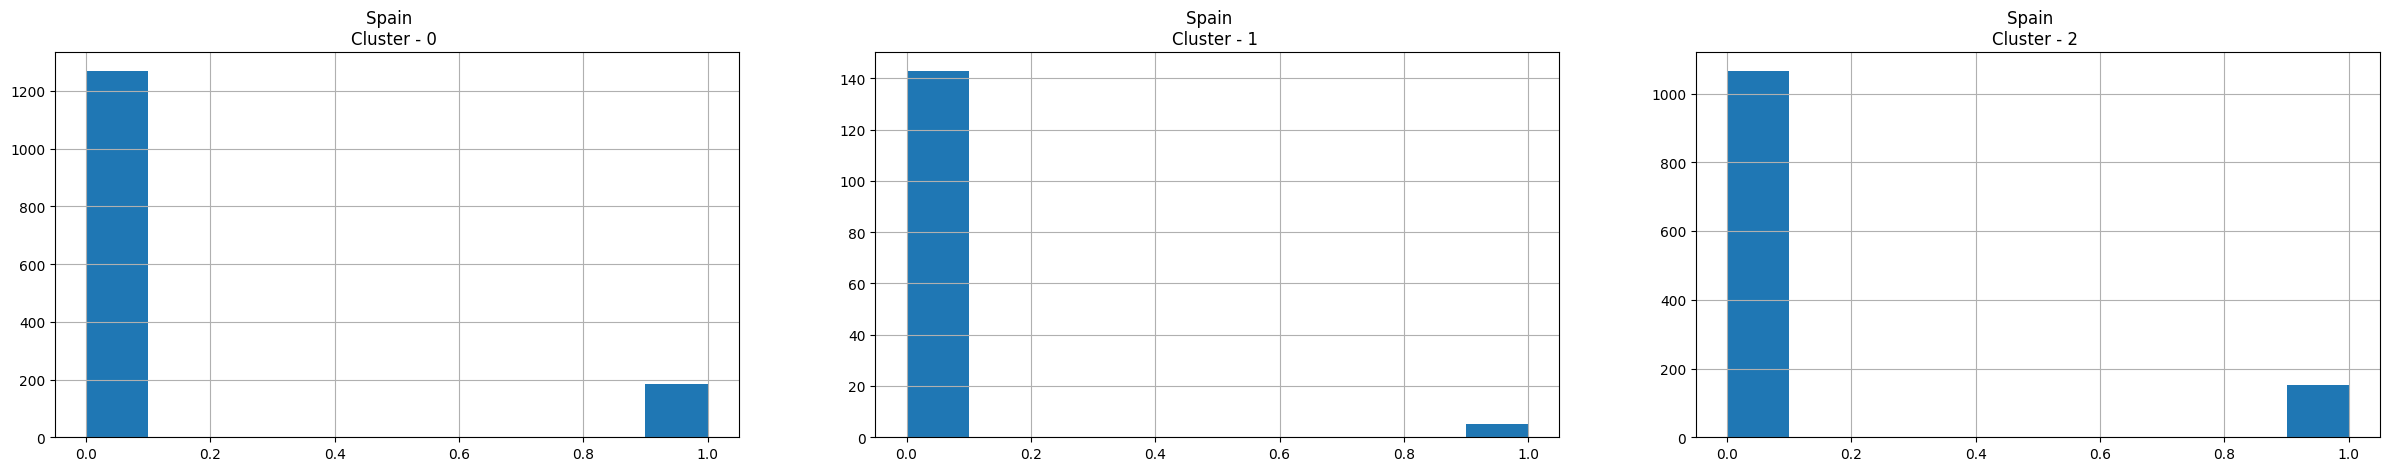

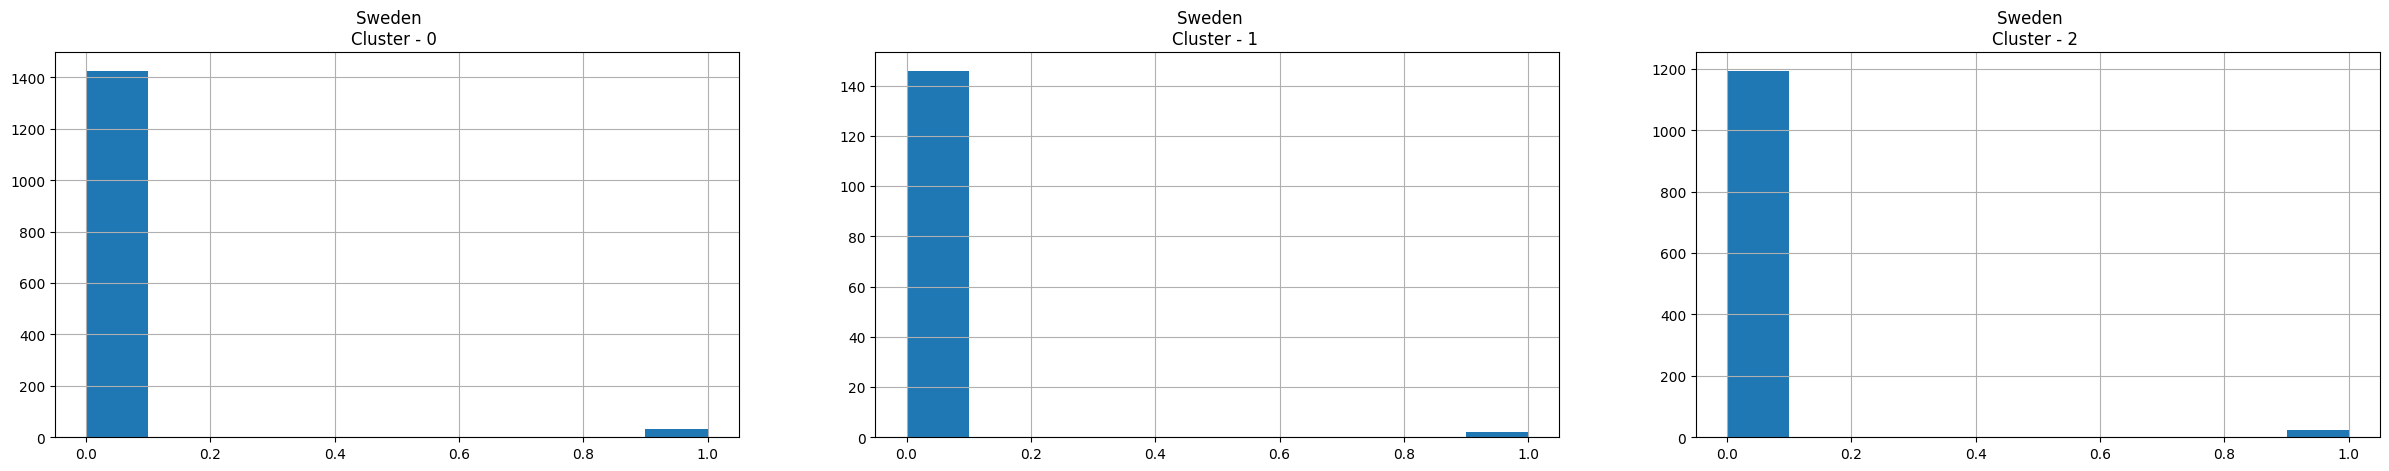

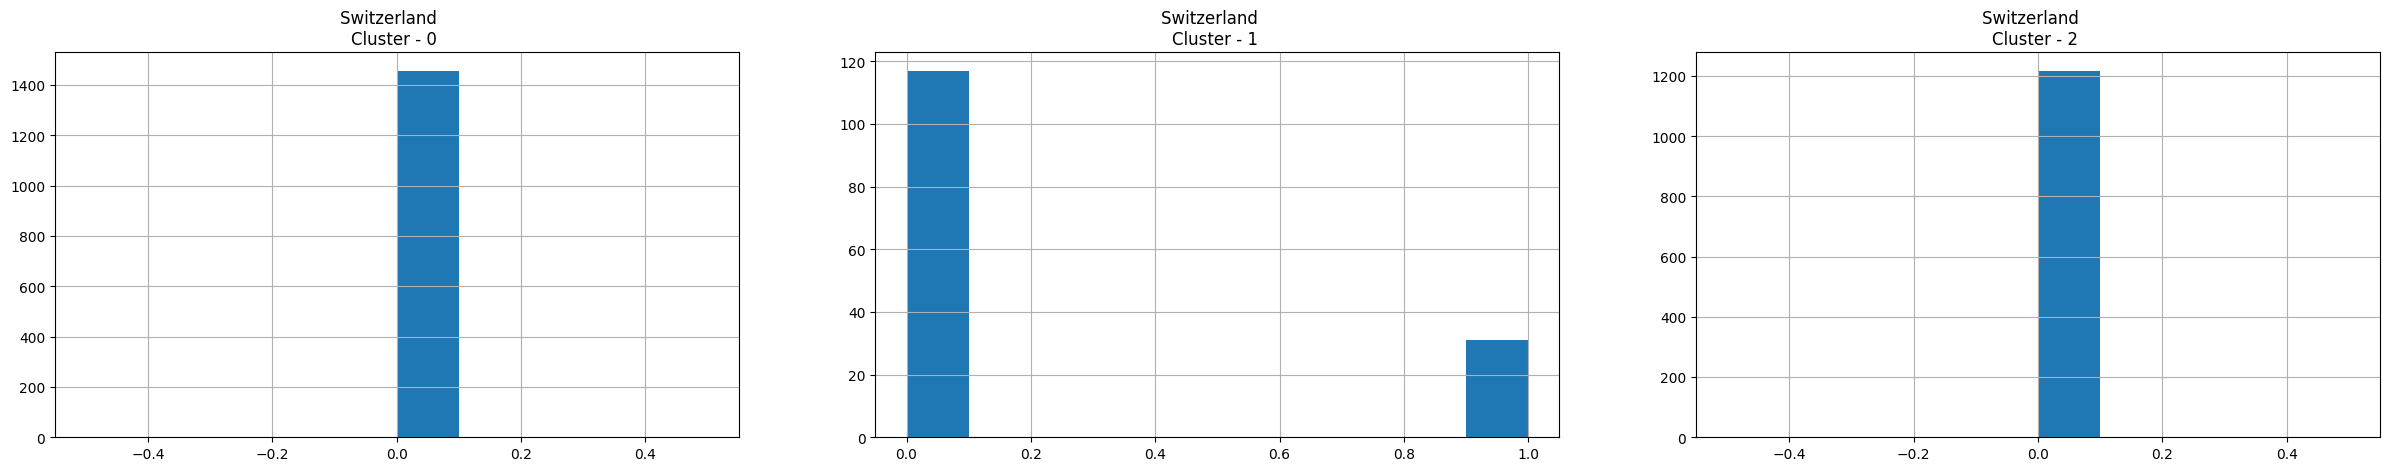

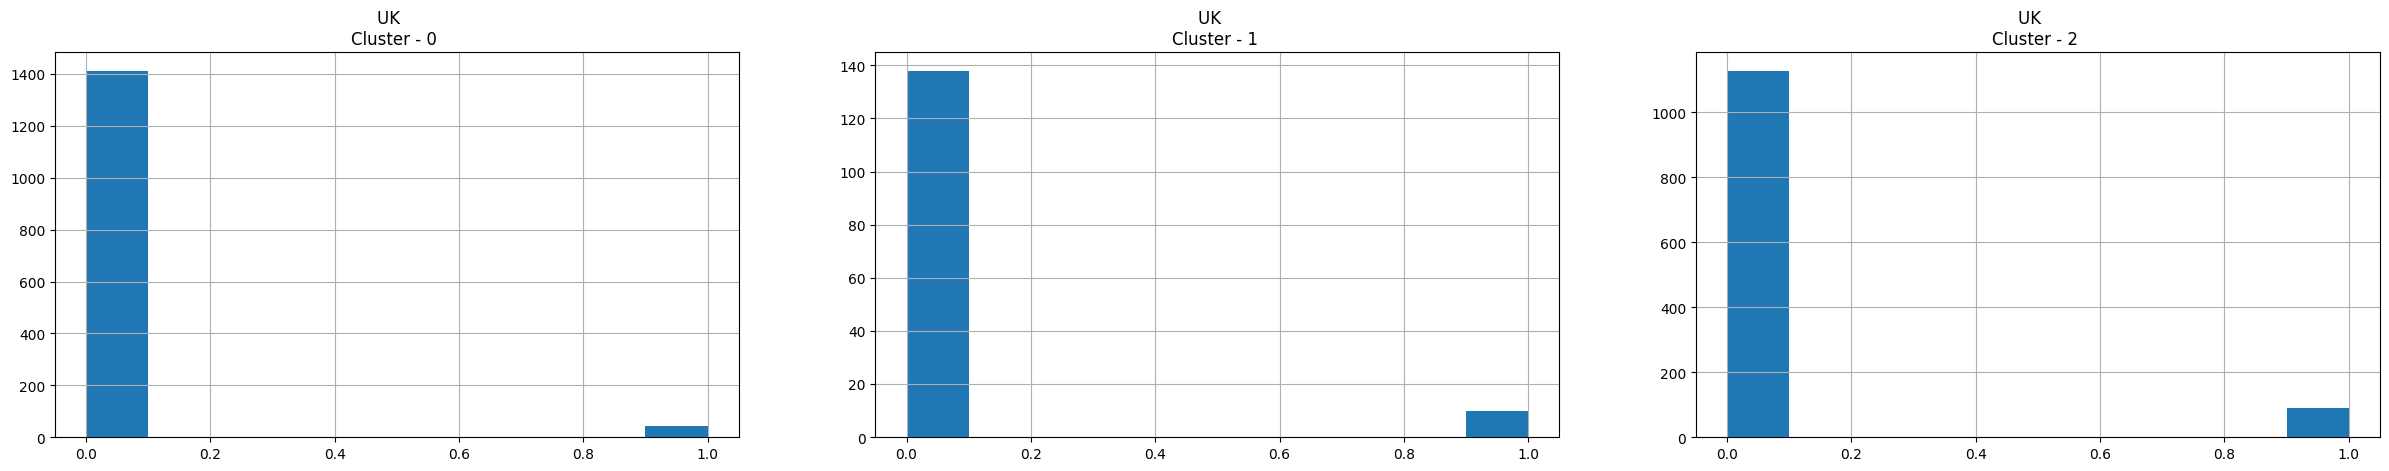

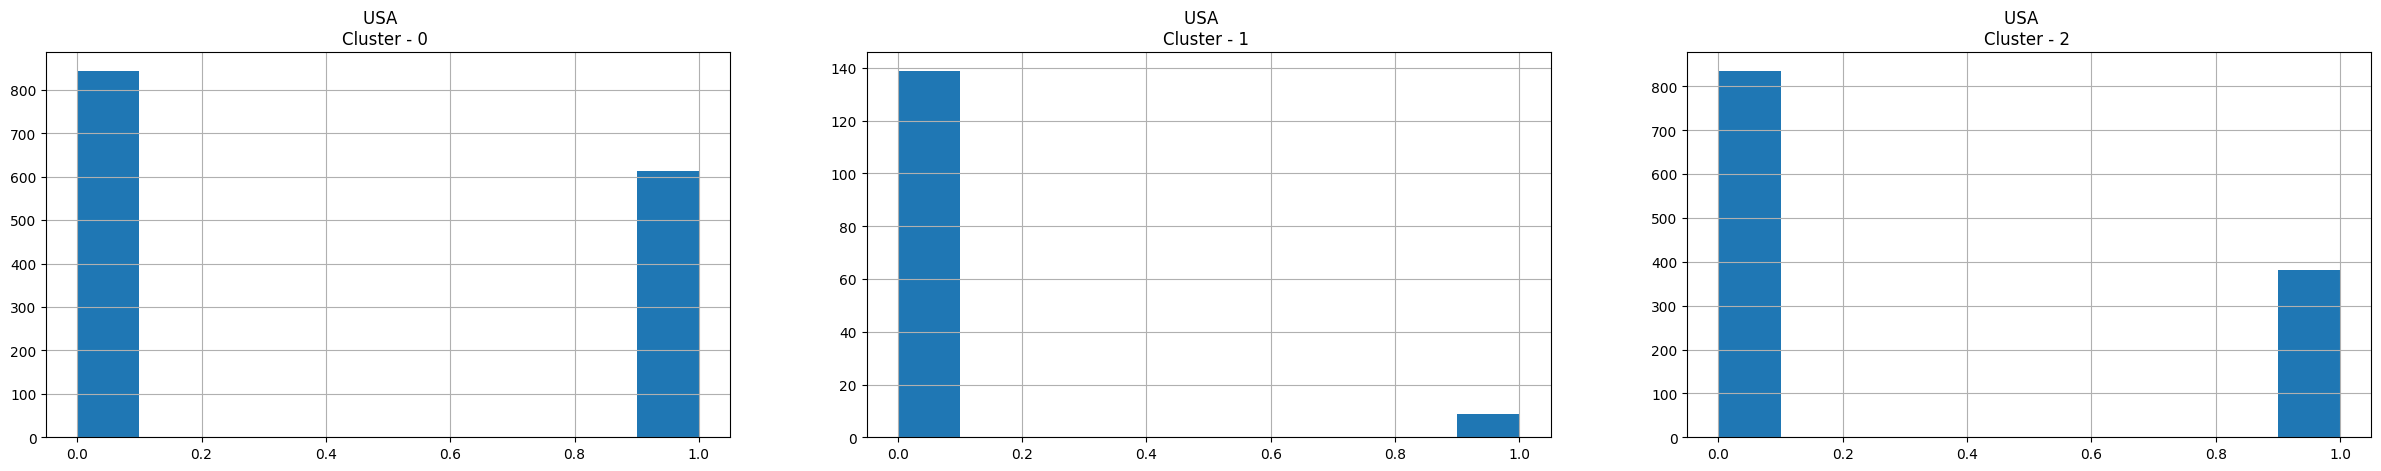

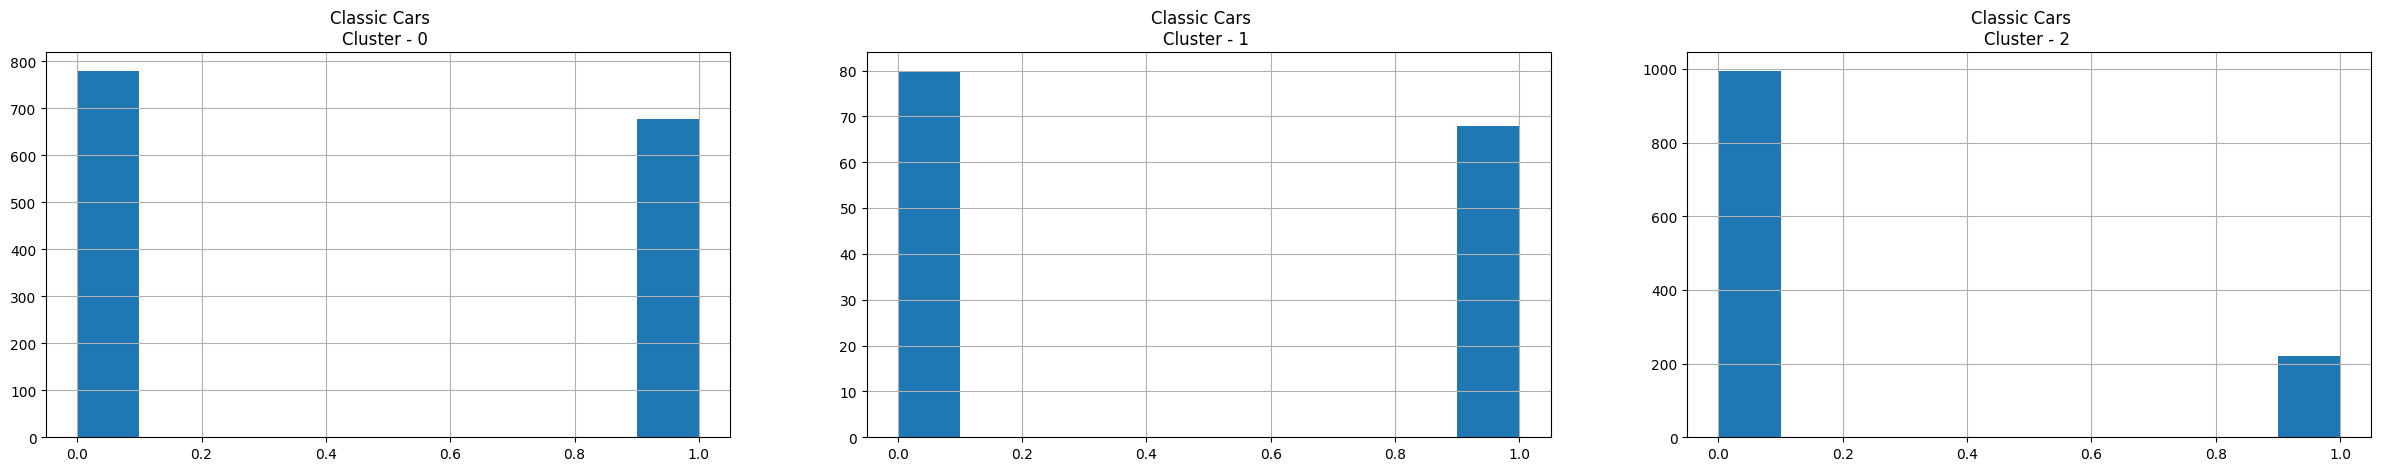

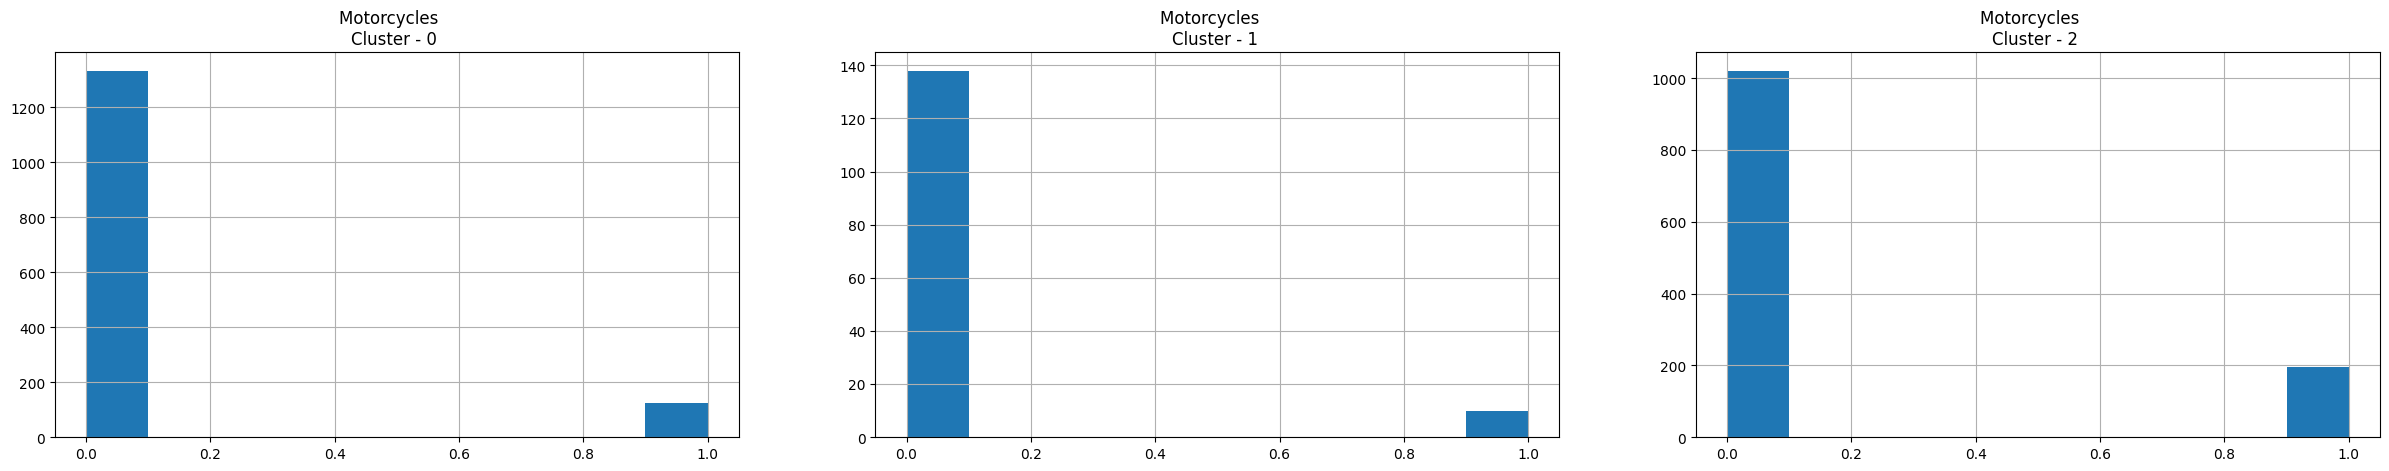

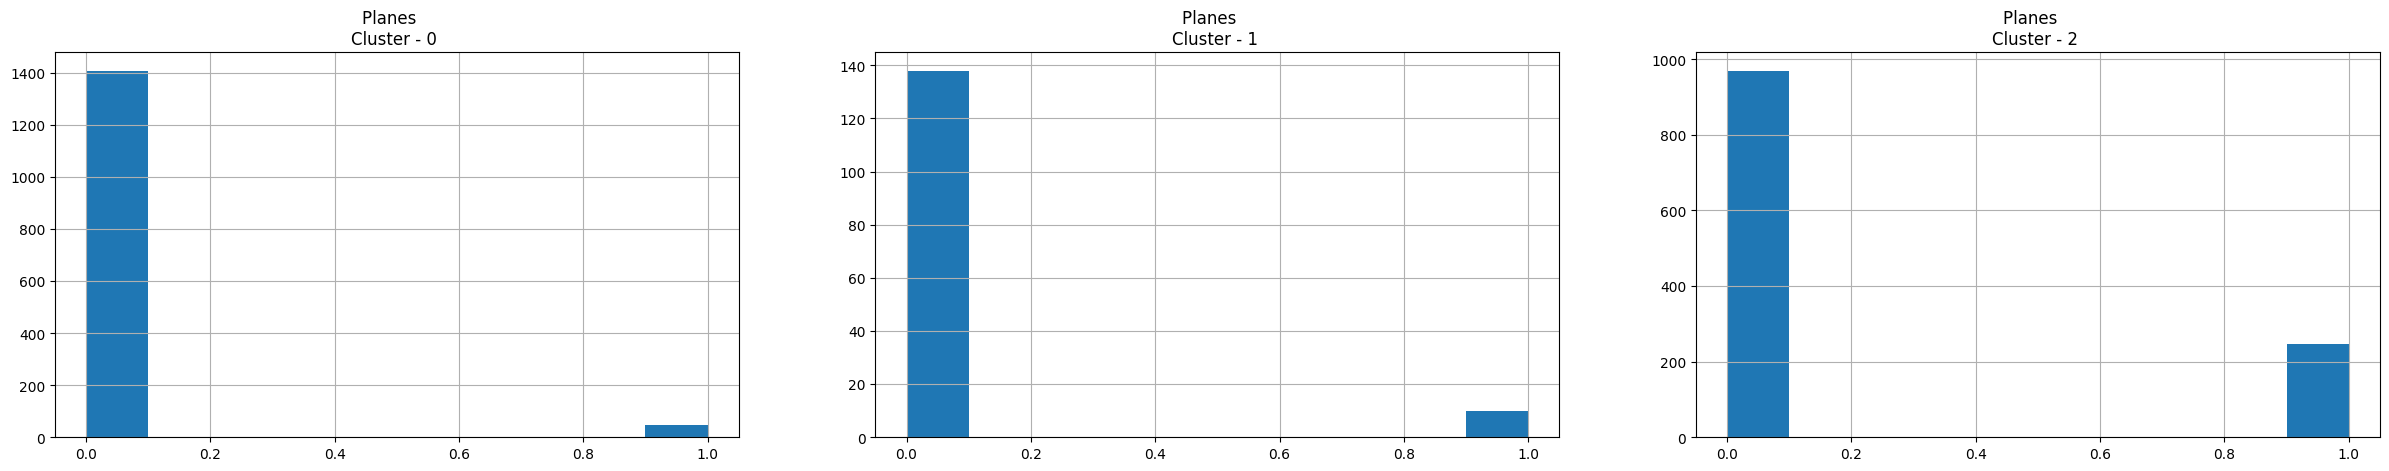

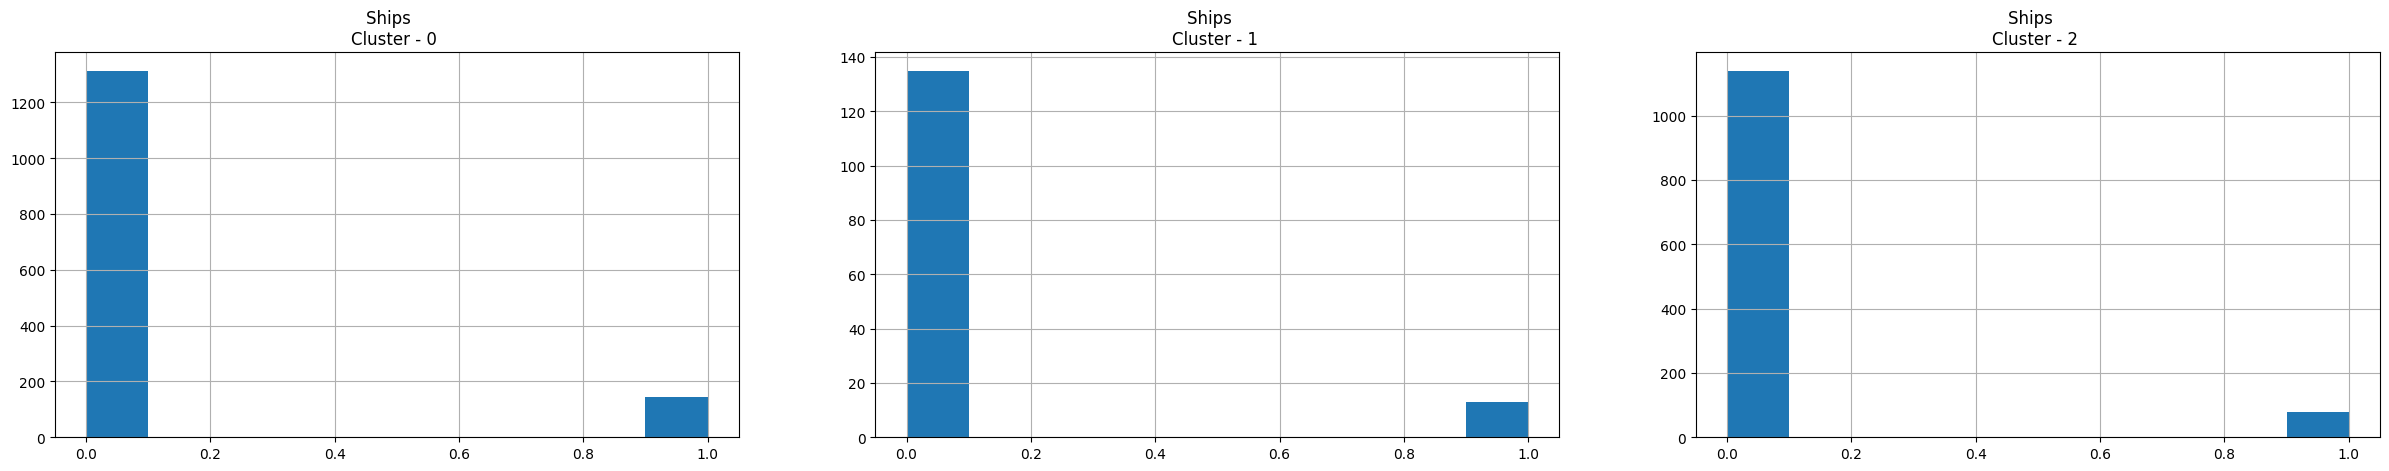

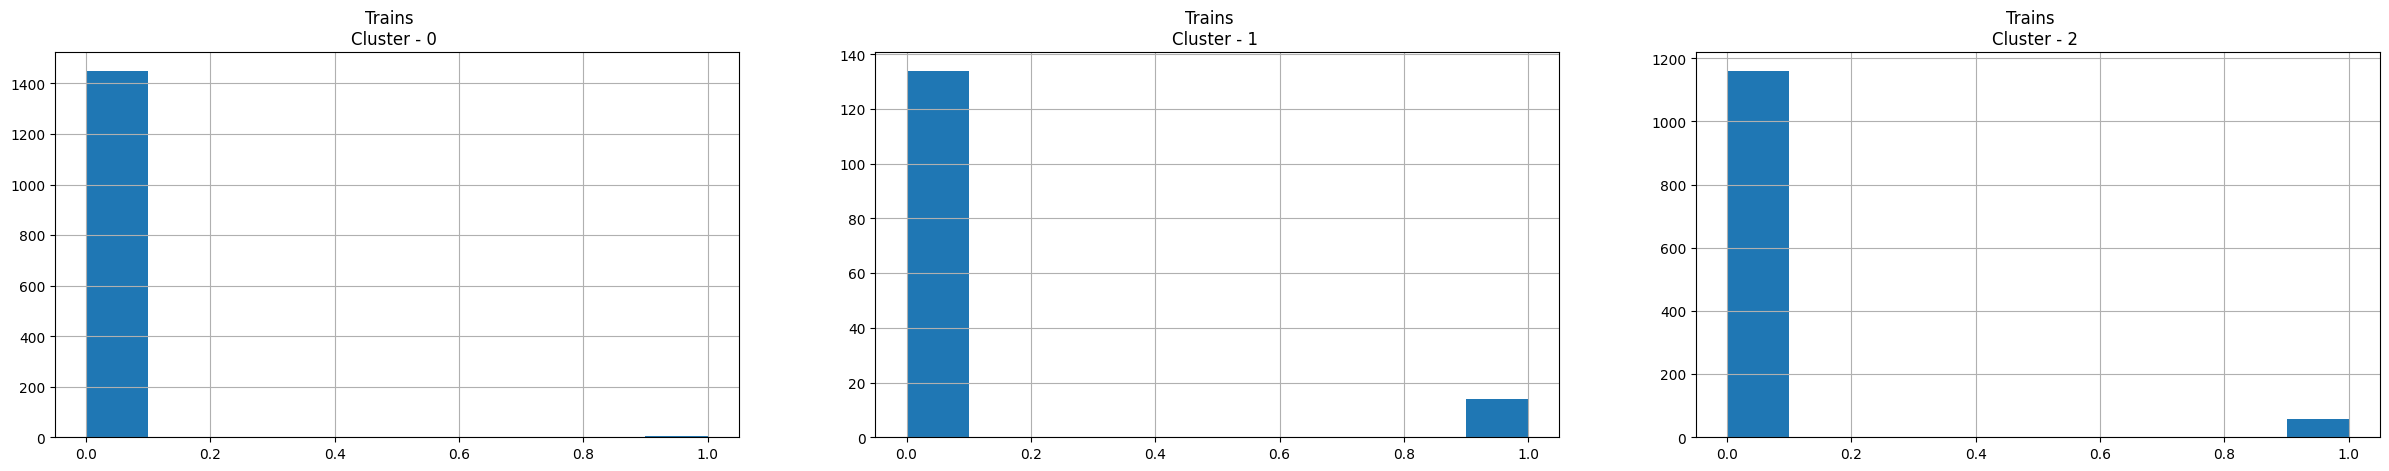

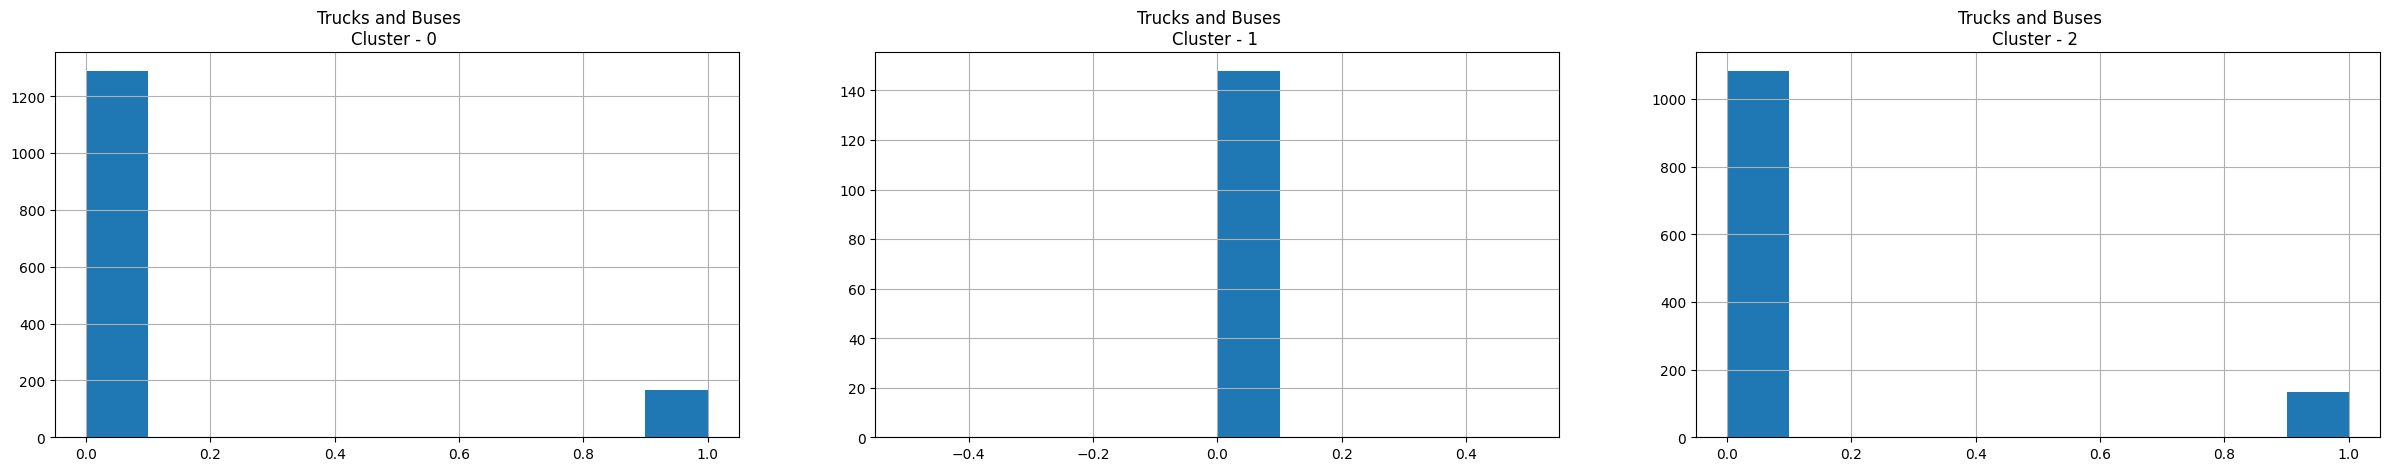

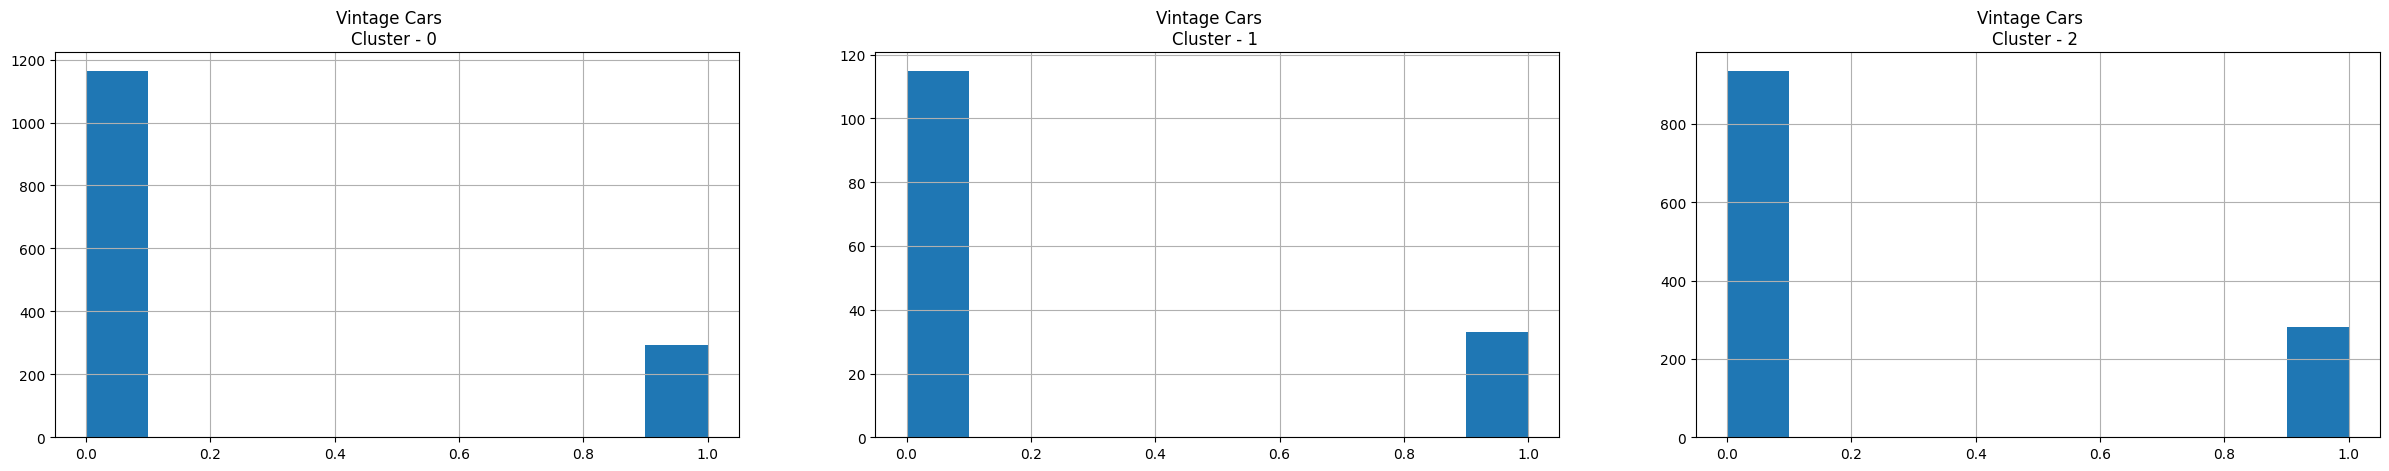

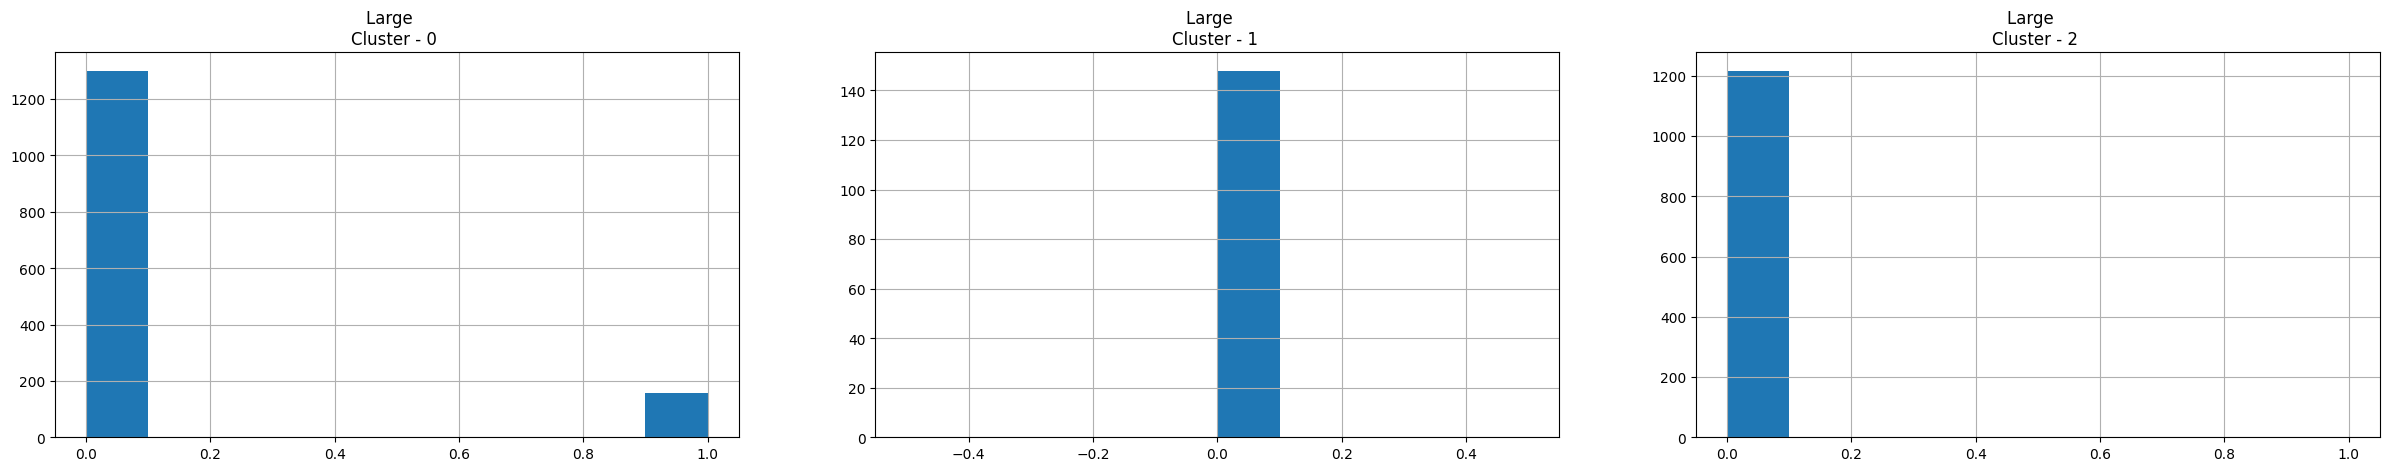

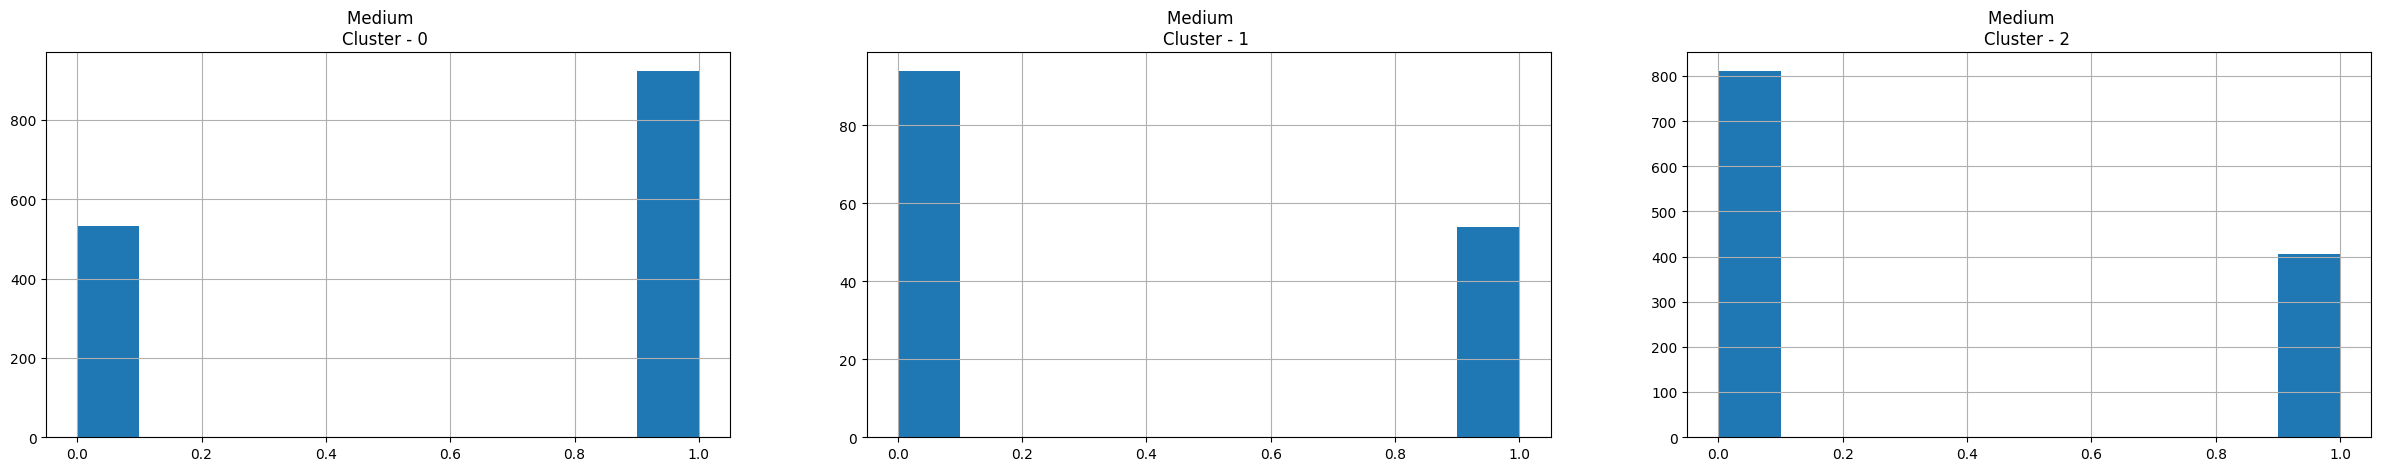

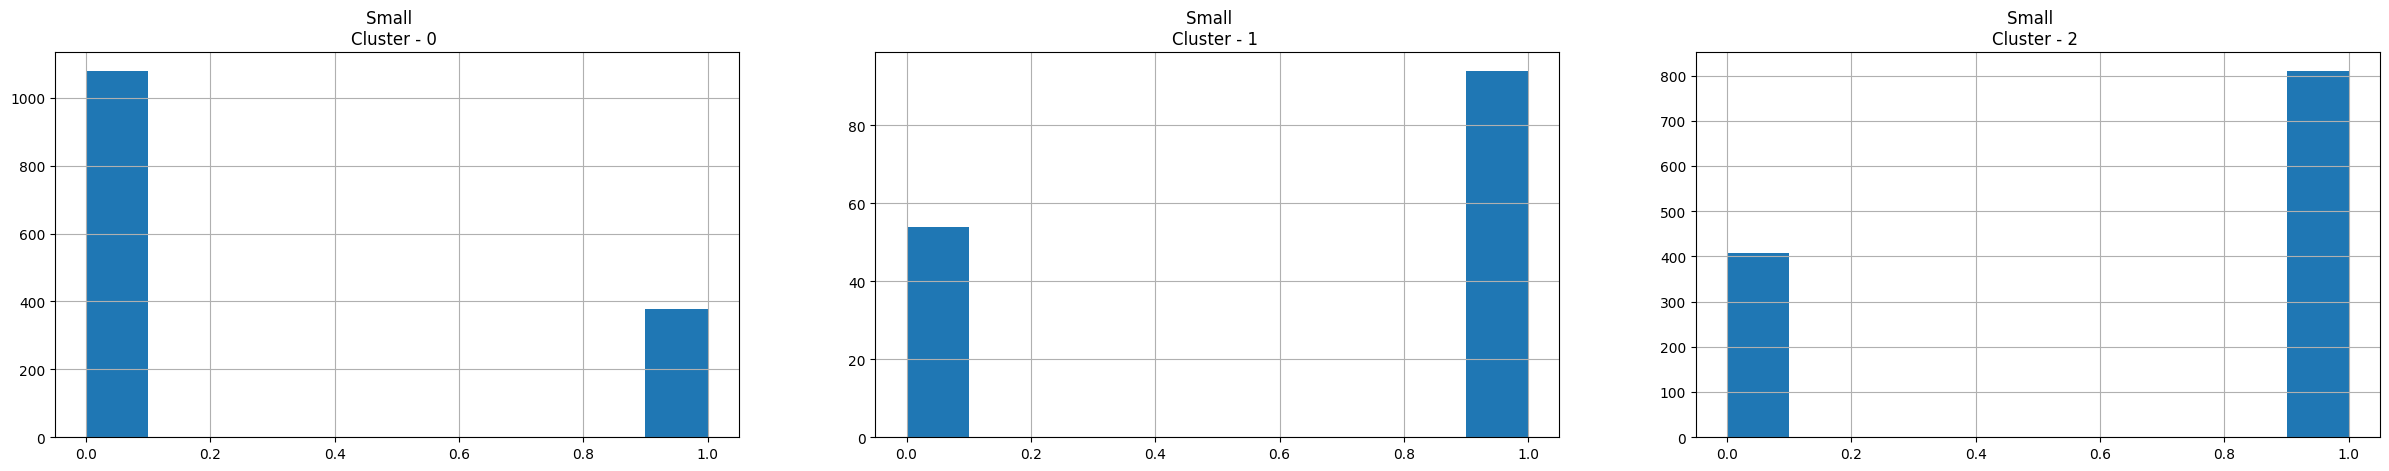

In [ ]:
#Plot the histogram with the new clusters for each feature
for i in sales[:8]:
  plt.figure(figsize = (30, 5))
  for j in range(3):
    plt.subplot(1, 3, j+1)
    cluster = clustered_data[clustered_data['Cluster'] == j]
    cluster[i].hist()
    plt.title('{}   \nCluster - {} '.format(i,j))

plt.show()
#

In [ ]:
#reduce the original data to 3 dimensions using PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X)
pca_data = pd.DataFrame(data = pca_result, columns = ['pca1', 'pca2', 'pca3'])
pca_data = pd.concat([pca_data, pd.DataFrame({'Cluster':labels})], axis=1)
pca_data.head()

,pca1,pca2,pca3,Cluster
0,-0.486292,-1.207481,1.012008,0
1,-0.784638,-1.049707,1.428694,0
2,1.431482,0.098990,0.281001,0
3,1.288459,-0.232247,-0.590446,0
4,1.976055,-0.145730,-1.065296,0


In [ ]:
#visualizing clusters using 3D scatterplot
fig = px.scatter_3d(pca_data, x='pca1', y='pca2', z='pca3', color='Cluster',symbol = 'Cluster', size_max = 18, opacity = 0.7)
fig.update_layout(margin = dict(l = 0, r = 0, b = 0, t = 0))